** Python

Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [37]:
def count_freq(word):
          words = word.split(' ')
          count = 0
          repeated_words = []
          for i in range(len(words)):
                    try:
                              if words[i] == words[i+1]:
                                        repeated_words.append(words[i])
                                        count += 1
                    except Exception as e:
                              pass
                    
          most_frequent_value = max(repeated_words, key=repeated_words.count)
          
          res = len(most_frequent_value)
                    
          return res

print(count_freq("write write write all the number from from from 1 to 100"))
          

5


In [38]:
def count_freq(word):
        words = word.split(' ')
        repeated_words = {}
        for word in words:
                if word in repeated_words.keys():
                        repeated_words[word]+=1
                else:
                        repeated_words[word] = 1
        
        highest_freq = max(repeated_words.values())    
                
        highest_freq_word = max(repeated_words,key=repeated_words.get) 
        
        return highest_freq

print(count_freq("write write write all the number from from from from 1 to 100"))
          

4


Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
Example output 1- YES
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
Example output 2 - NO


In [39]:
def word_occurence(word):
          word_occur = {}

          for i in word:
                    if i in word_occur.keys():
                              word_occur[i]+=1
                    else:
                             word_occur[i] = 1
          
          for character in word_occur:
                    if word_occur[character] == 1:
                              del word_occur[character]
                              break
                    
          set_val = set(word_occur.values())
          
          if len(set_val) > 1:
                    return 'No'
          else:
                    return 'Yes'
                             
          
                    
print(word_occurence('abccba'))

Yes


In [40]:
def word_occurence(word):
          word_occur = []
          
          for i in word:
                    word_occur.append(i)
                    
          count_char = []
          
          for i in range(len(word_occur)):
                    if word_occur.count(word_occur[i]) == 1:
                              del word_occur[i]
                              continue
                    
                    count_char.append(word_occur.count(word_occur[i]))  
                              
          set_count = set(count_char)
          
          if len(set_count) > 1:
                    return 'No'
          else:
                    return 'Yes'
                             
          
                    
print(word_occurence('aabbccssaabbccss'))

Yes


Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json


Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

In [ ]:
import requests
import json
import pandas as pd
from datetime import datetime

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)

if response.status_code == 200:

        json_data = json.loads(response.content)

        dict1 = {}

        dict1.update({"id": [],"num": [],"name": [],"img": [],"type": [],"height": [],"weight": [],"candy": [],"candy_count":[],"egg": [],"spawn_chance": [],"avg_spawns": [],"spawn_time":[],"multipliers": [],"weaknesses":[],"next_evolution": [],"prev_evolution":[]})
        
        for key,value in json_data.items():
                for data in value:
                        columns = []
                        for x,y in data.items():
                                columns.append(x)
                                if x == 'id' or x == 'num' or x == 'candy_count' or x == 'avg_spawns':
                                        dict1[x].append(int(y))
                                elif x ==  'name' or x == 'img' or x == 'type' or x == 'candy':
                                        dict1[x].append(str(y))
                                elif x ==  'height' or x == 'weight' or x == 'egg' or x == 'spawn_chance':
                                        try:
                                                if type(y) == str and  ' ' in y:
                                                        d1 = y.split(' ')
                                                        final_d1 = float(d1[0])
                                                else:
                                                        final_d1 = float(y)
                                                        
                                                dict1[x].append(final_d1)
                                        except:
                                                dict1[x].append(None)
                                elif x ==  'spawn_time':
                                        try:
                                                datetime_obj = datetime.strptime(y, "%M:%S")
                                                dict1[x].append(datetime_obj)
                                        except:
                                                dict1[x].append(None)
                                elif x ==  'multipliers' or x ==  'weaknesses' or  x == 'next_evolution' or x == 'prev_evolution':
                                        dict1[x].append(y)
                                                  
                        if 'candy_count' not in columns:
                                dict1['candy_count'].append(None)
                                
                        if 'next_evolution' not in columns:
                                dict1['next_evolution'].append(None)
                                
                        if 'prev_evolution' not in columns: 
                                dict1['prev_evolution'].append(None)      
                                 

        # Create a DataFrame from the list of lists
        df = pd.DataFrame(dict1)

        df.to_excel("pokemon.xlsx")
        
# observation when i writing this logic i observe three dict key and values are missing in the data i just replace it with None


Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding

● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [41]:
import requests
import json
import csv
from datetime import datetime

url = "https://data.nasa.gov/resource/y77d-th95.json"

response = requests.get(url)

json_data = response.json()

row_val = []

for data in json_data:
        temp_list = []
        column_name = []
        for x,y in data.items():
                if x == 'name' or x ==  'id' or x ==  'nametype' or x == 'recclass' or x ==  'mass' or x ==  'fall' or x ==  'reclat' or x ==  'reclong':
                        column_name.append(x)
                        temp_list.append(y)
                elif  x ==  'year':
                        datetime_obj = datetime.strptime(y, "%Y-%m-%dT%H:%M:%S.%f")
                        column_name.append(x)
                        temp_list.append(datetime_obj)
                else:
                        try:
                                column_name.append('coordinates')
                                temp_list.append(data[x]['coordinates'])
                        except:
                                pass
                row_val.append(temp_list)
                                
with open("my_csv_file.csv", "w", newline="",encoding="utf-8") as f:
        csv_writer = csv.writer(f)

        csv_writer.writerow(column_name)
        
        for row in row_val:
                csv_writer.writerow(row)
          
f.close()


Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

In [180]:
import requests
import re
from datetime import datetime
import pandas as pd

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(url)

json_data = response.json()

dict1 = {}

dict1.update({"id": [],"url": [],"name": [],"season": [],"number": [],"type": [],"airdate": [],"airtime": [],"runtime":[],"average rating": [],"summary": [],"medium image link": [],"original image link":[]})

list1 = ["id","url","name","season","number","type","airdate","airtime","runtime","average rating","summary","medium image link","Original image link"]

for key,val in json_data['_embedded'].items():
          if key == 'episodes':
                    for data in val:
                              columns = []
                              for d1,d2 in data.items():
                                        columns.append(d1)
                                        if d1 in list1:
                                                  if d1 == 'id' or d1 == "number" or d1 == 'season':
                                                            dict1[d1].append(int(d2))
                                                  elif d1 == 'summary':
                                                            summary_data = re.sub('[<p></p><b></b>]', '', d2)
                                                            dict1[d1].append(summary_data)
                                                  elif d1 == "runtime" or d1 == "average rating":
                                                            dict1[d1].append(float(d2))
                                                  elif d1 == 'airdate':
                                                            dict1[d1].append(datetime.strptime(d2, "%Y-%m-%d"))
                                                  elif d1 == 'airtime':
                                                            datetime_obj = datetime.strptime(d2, "%H:%M")
                                                            formatted_time = datetime_obj.strftime("%I:%M:%S %p")
                                                            dict1[d1].append(formatted_time)
                                                  else:
                                                            dict1[d1].append(d2)
                                        elif d1 == "image":
                                                  for x,y in d2.items():
                                                            dict1[x + " image link"].append(y) 
                                        elif d1 == 'rating':
                                                  dict1["average " + d1].append(float(d2['average']))
                                        
         

df = pd.DataFrame(dict1)

df.to_excel("season.xlsx")


Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding



Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities


In [3]:
import pandas as pd

df = pd.read_excel("D:/ml_assignment_code/python_assignment/pokemon.xlsx",index_col=0)
df_copy = df.copy()

In [4]:
df_copy.head()


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2.0,0.690,69,00:20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,NaN,0.042,4,00:07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,NaN,NaN,0.017,1,00:11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.253,25,00:08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.012,1,00:19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    float64
 6   weight          151 non-null    float64
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             73 non-null     float64
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    int64  
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(5), int64(3), object(9)


In [6]:
df_copy.isnull().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg               78
spawn_chance       0
avg_spawns         0
spawn_time         6
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
dtype: int64

Get all Pokemons whose spawn rate is less than 5%

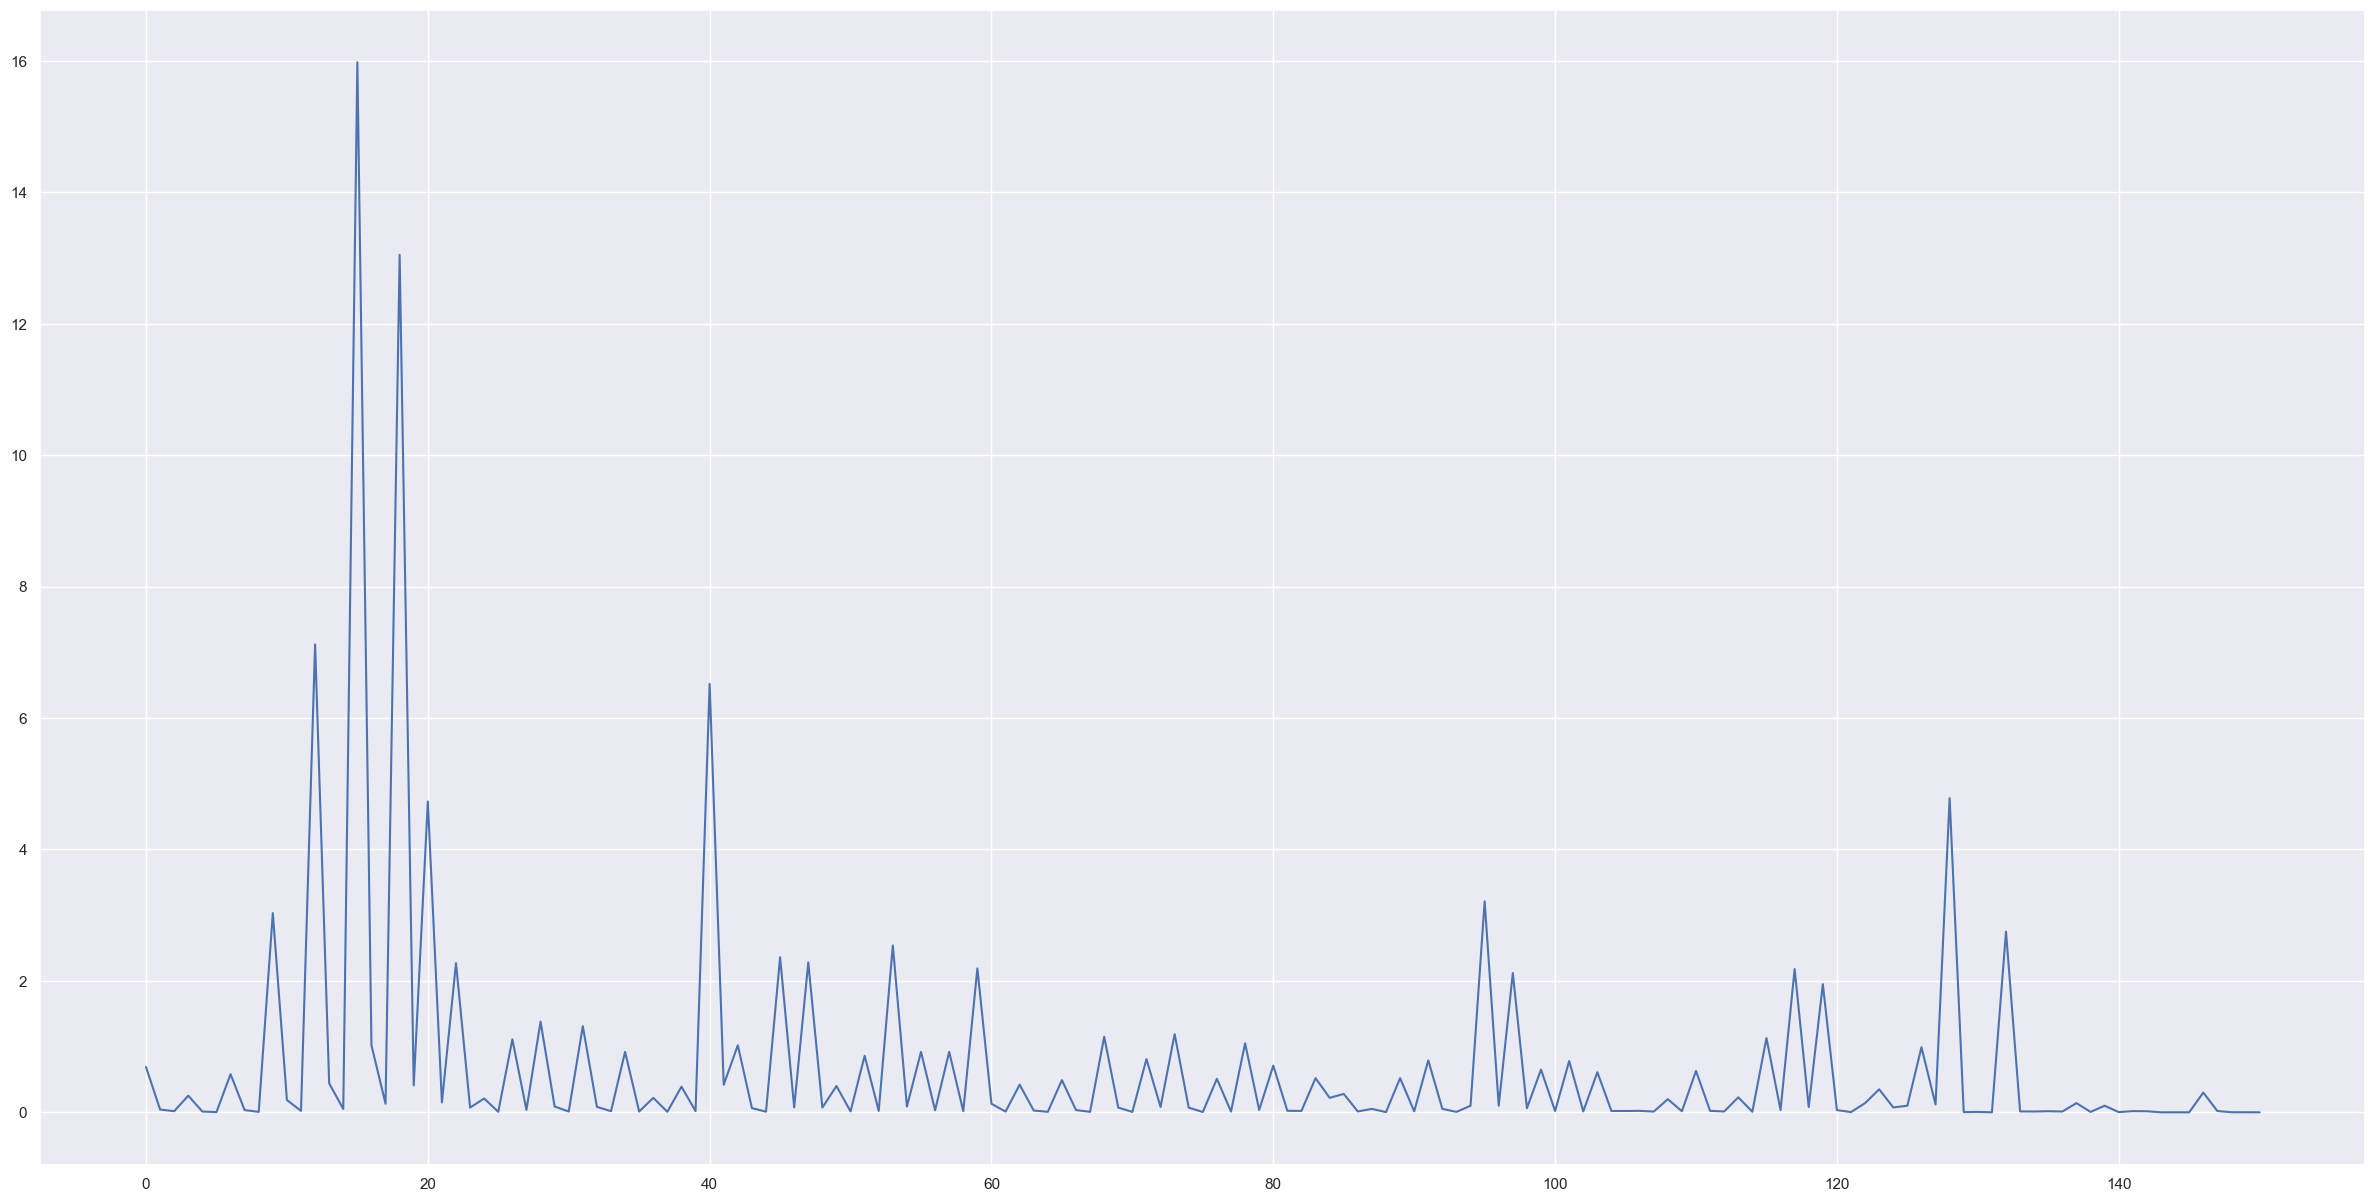

In [12]:
#Get all Pokemons whose spawn rate is less than 5%

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})

plt.plot(df_copy["spawn_chance"])
plt.show()


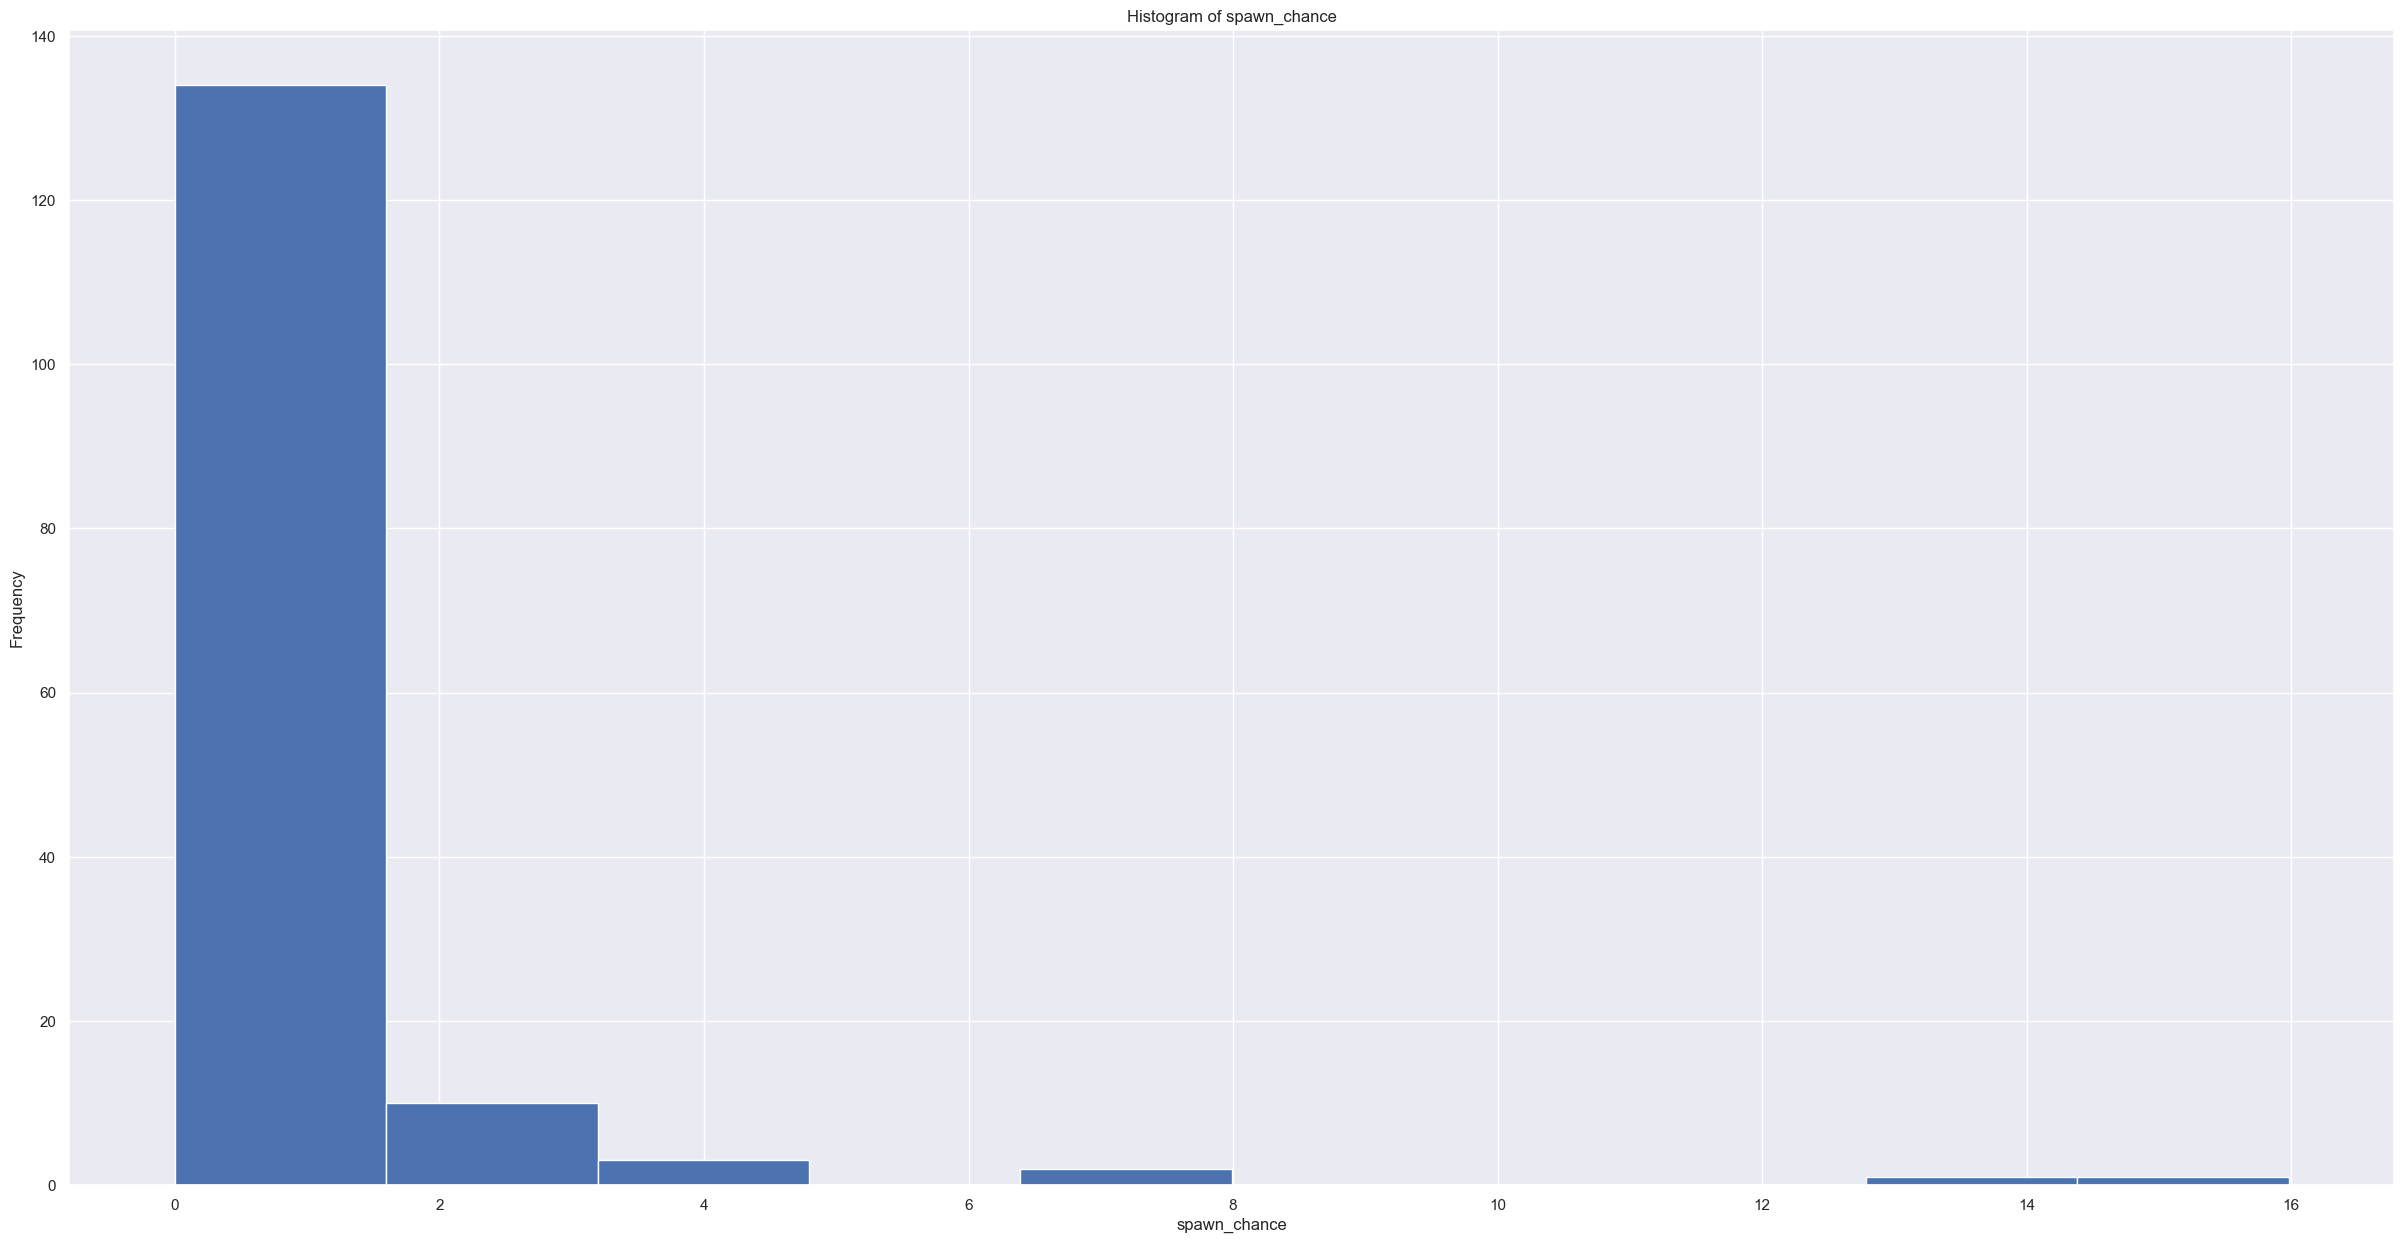

In [17]:
plt.hist(df_copy["spawn_chance"], bins=10)
plt.xlabel('spawn_chance')
plt.ylabel('Frequency')
plt.title('Histogram of spawn_chance')
plt.show()

In [160]:
# Observation we can check we have many values which is spawn_chance which is having less then 5% rate

In [14]:
df1 = df_copy[df_copy["spawn_chance"]*100 < 5]

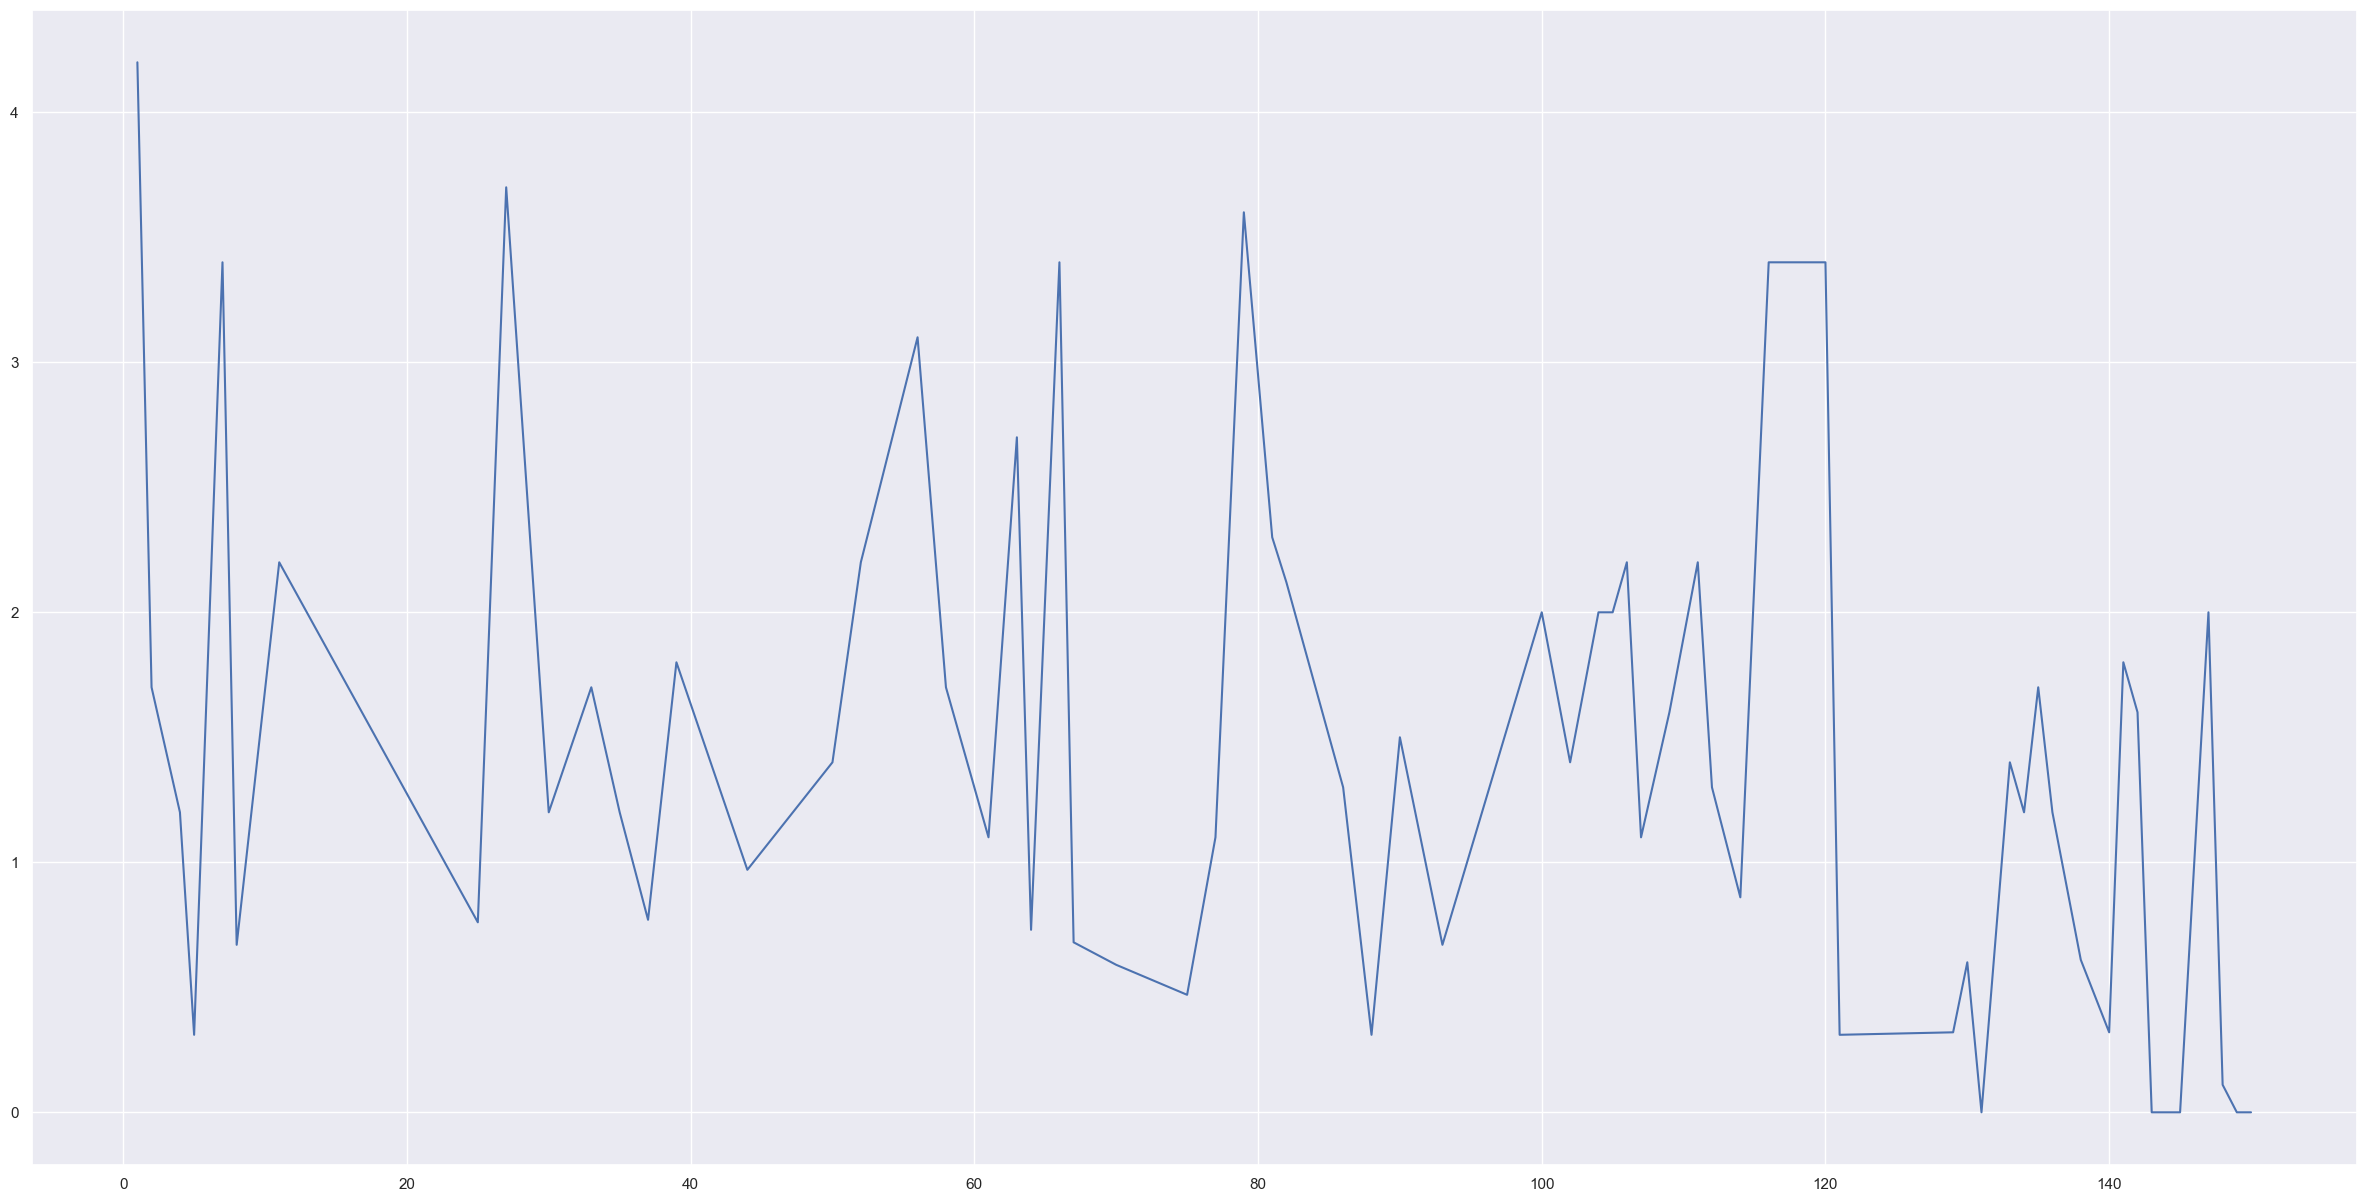

In [15]:
plt.plot(df1["spawn_chance"]*100)
plt.show()

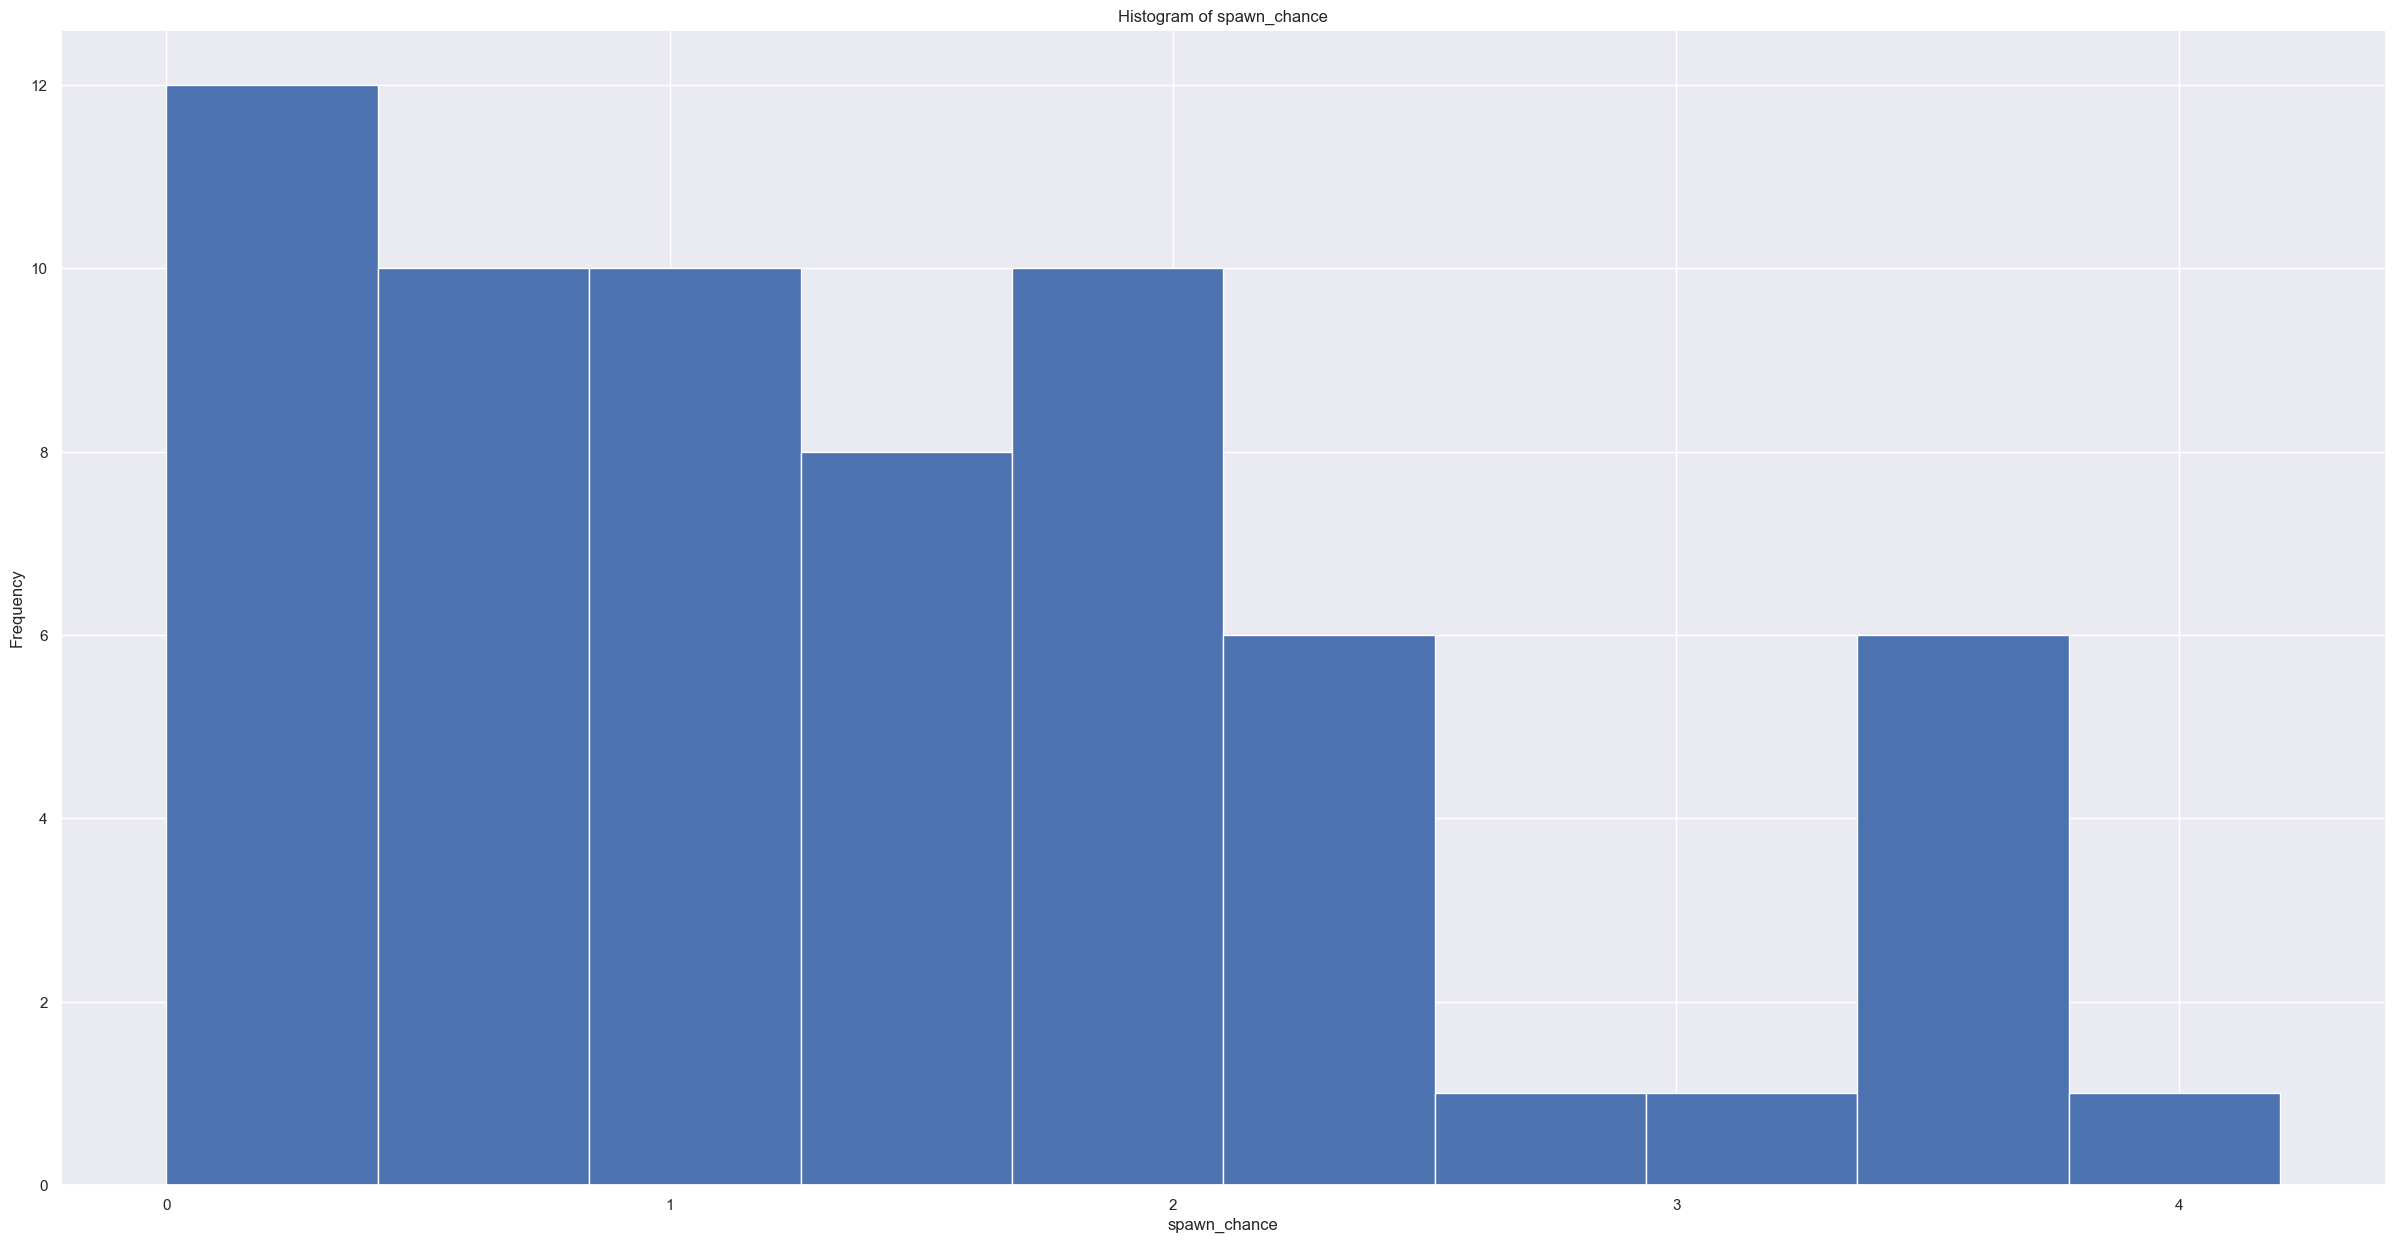

In [18]:
plt.hist(df1["spawn_chance"]*100, bins=10)
plt.xlabel('spawn_chance')
plt.ylabel('Frequency')
plt.title('Histogram of spawn_chance')
plt.show()

● Get all Pokemons that have less than 4 weaknesses

In [19]:
df_copy["weaknesses"] = df_copy["weaknesses"].apply(lambda x: x.split(","))

In [20]:
df_copy["weaknesses_len"] = df_copy["weaknesses"].apply(len)

In [21]:
df_copy["weaknesses_len"]

0      4
1      4
2      4
3      3
4      3
      ..
146    3
147    3
148    4
149    3
150    3
Name: weaknesses_len, Length: 151, dtype: int64

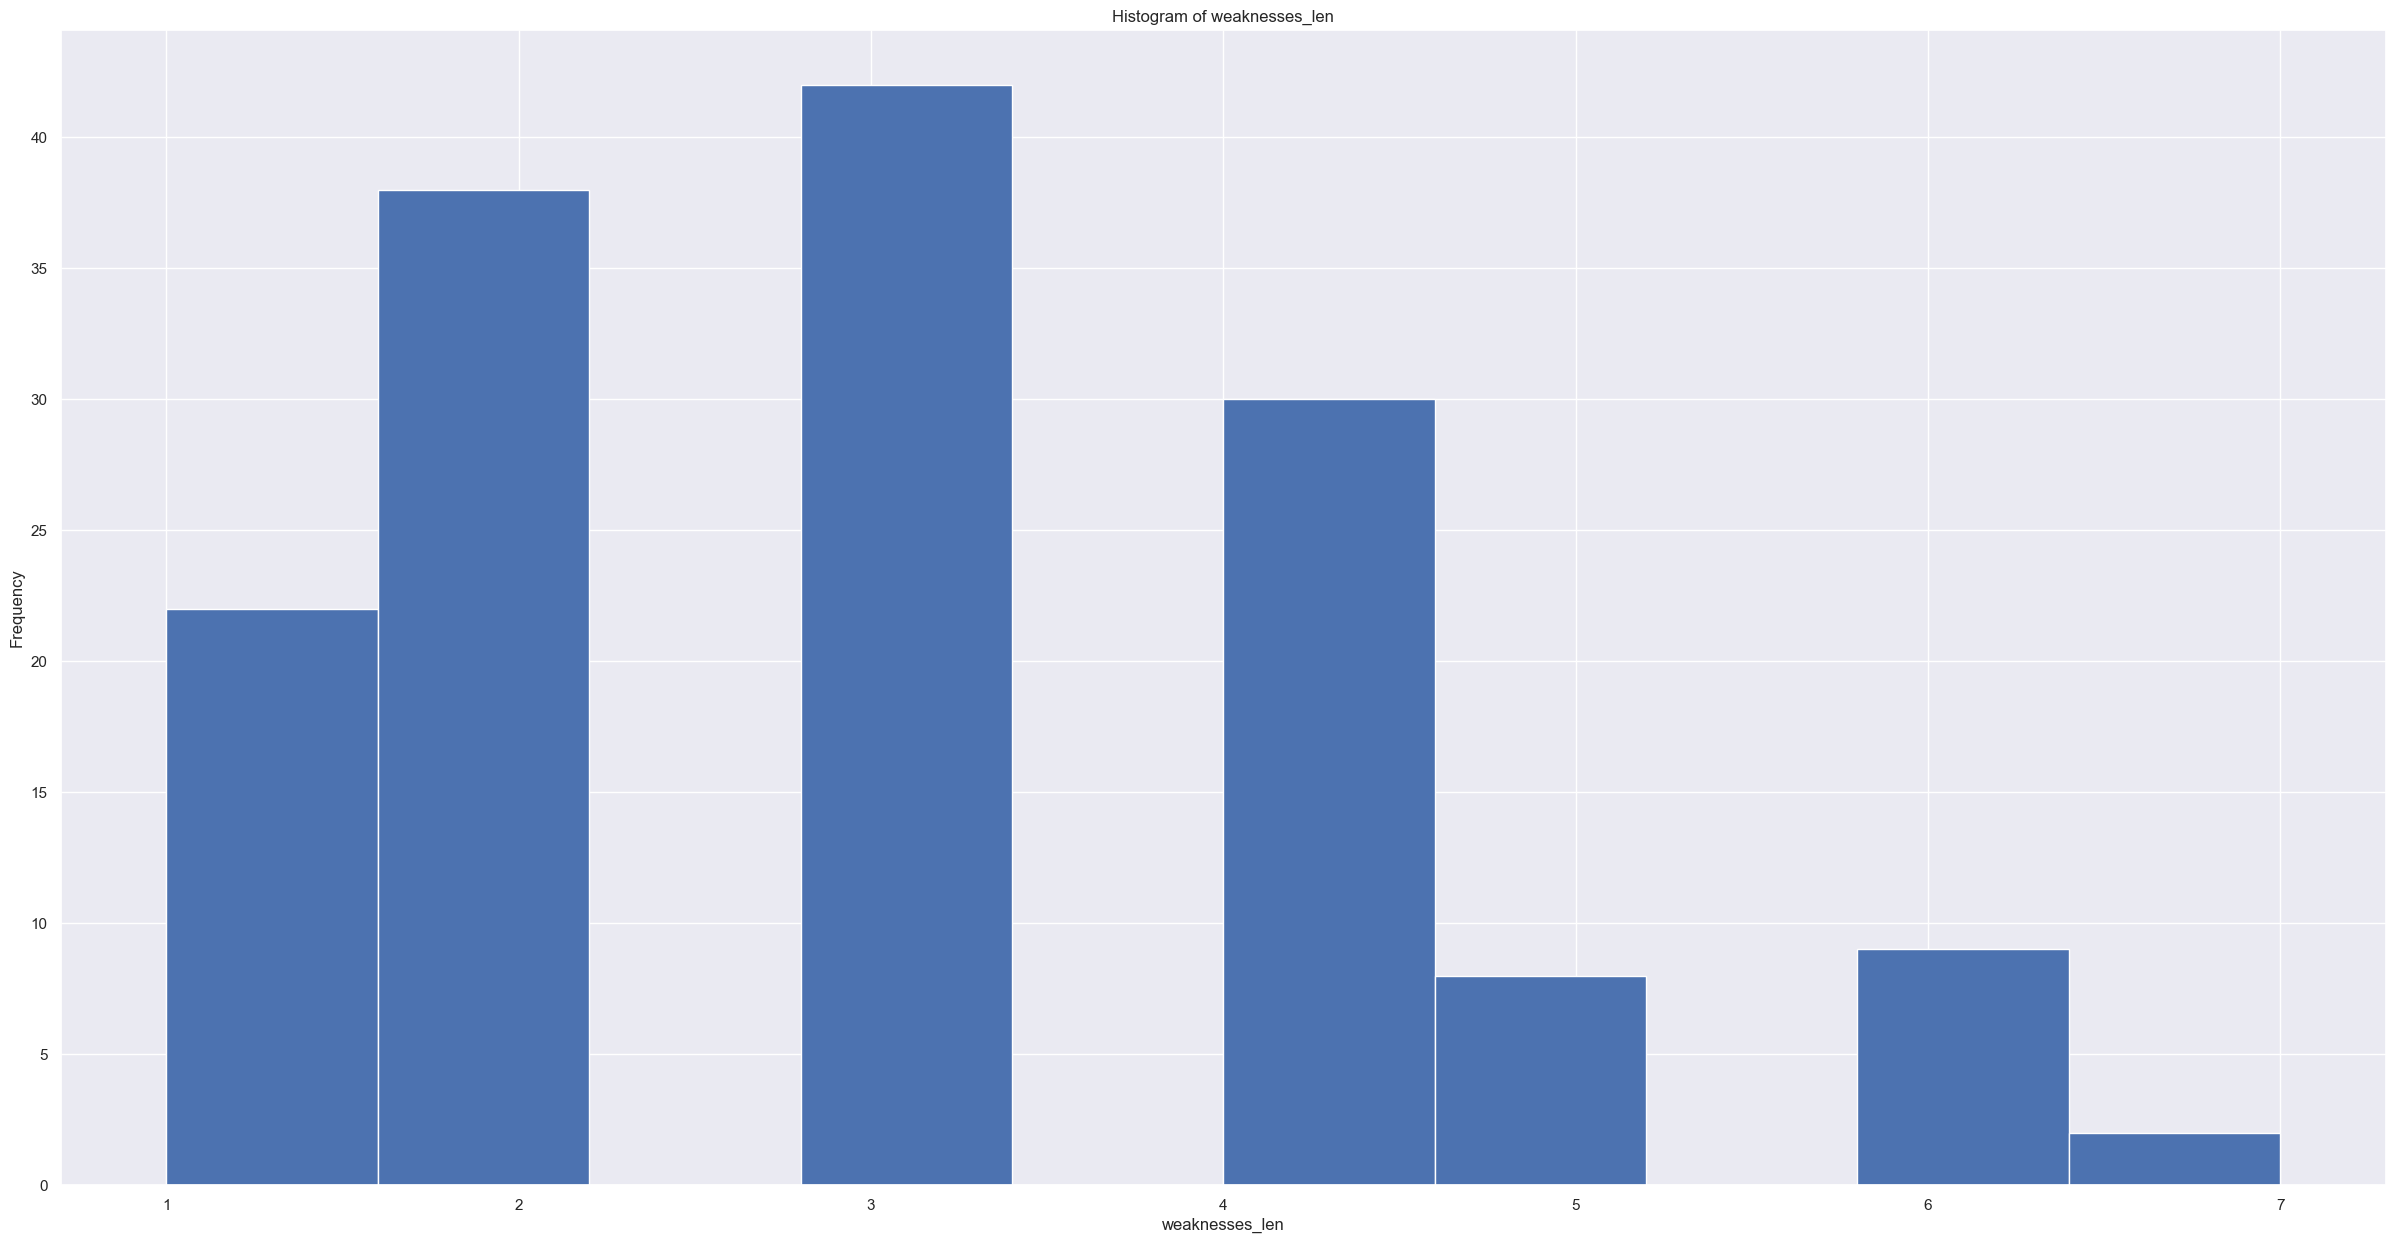

In [51]:
plt.hist(df_copy["weaknesses_len"], bins=10)
plt.xlabel('weaknesses_len')
plt.ylabel('Frequency')
plt.title('Histogram of weaknesses_len')
plt.show()

In [294]:
## Chart showes we are having some values which weakness len is less then 4

In [26]:
df2 = df_copy[df_copy["weaknesses_len"] < 4]

In [27]:
# This much values we are having where weakness len is less then 4

df2

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_len
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.2530,25,00:08:45,[1.65],"[['Water', 'Ground', 'Rock']]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.0120,1,00:19:00,[1.79],"[['Water', 'Ground', 'Rock']]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70,90.5,Charmander Candy,NaN,NaN,0.0031,0,00:13:34,NaN,"[['Water', 'Electric', 'Rock']]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",3
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51,9.0,Squirtle Candy,25.0,2.0,0.5800,58,00:04:25,[2.1],"[['Electric', 'Grass']]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99,22.5,Squirtle Candy,100.0,NaN,0.0340,3,00:07:02,[1.4],"[['Electric', 'Grass']]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01,60.0,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Water', 'Electric', 'Rock']]",NaN,NaN,3
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80,3.3,Dratini Candy,25.0,10.0,0.3000,30,00:06:41,"[1.83, 1.84]","[['Ice', 'Dragon', 'Fairy']]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99,16.5,Dratini Candy,100.0,NaN,0.0200,2,00:11:57,[2.05],"[['Ice', 'Dragon', 'Fairy']]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Bug', 'Ghost', 'Dark']]",NaN,NaN,3


<Axes: ylabel='weaknesses_len'>

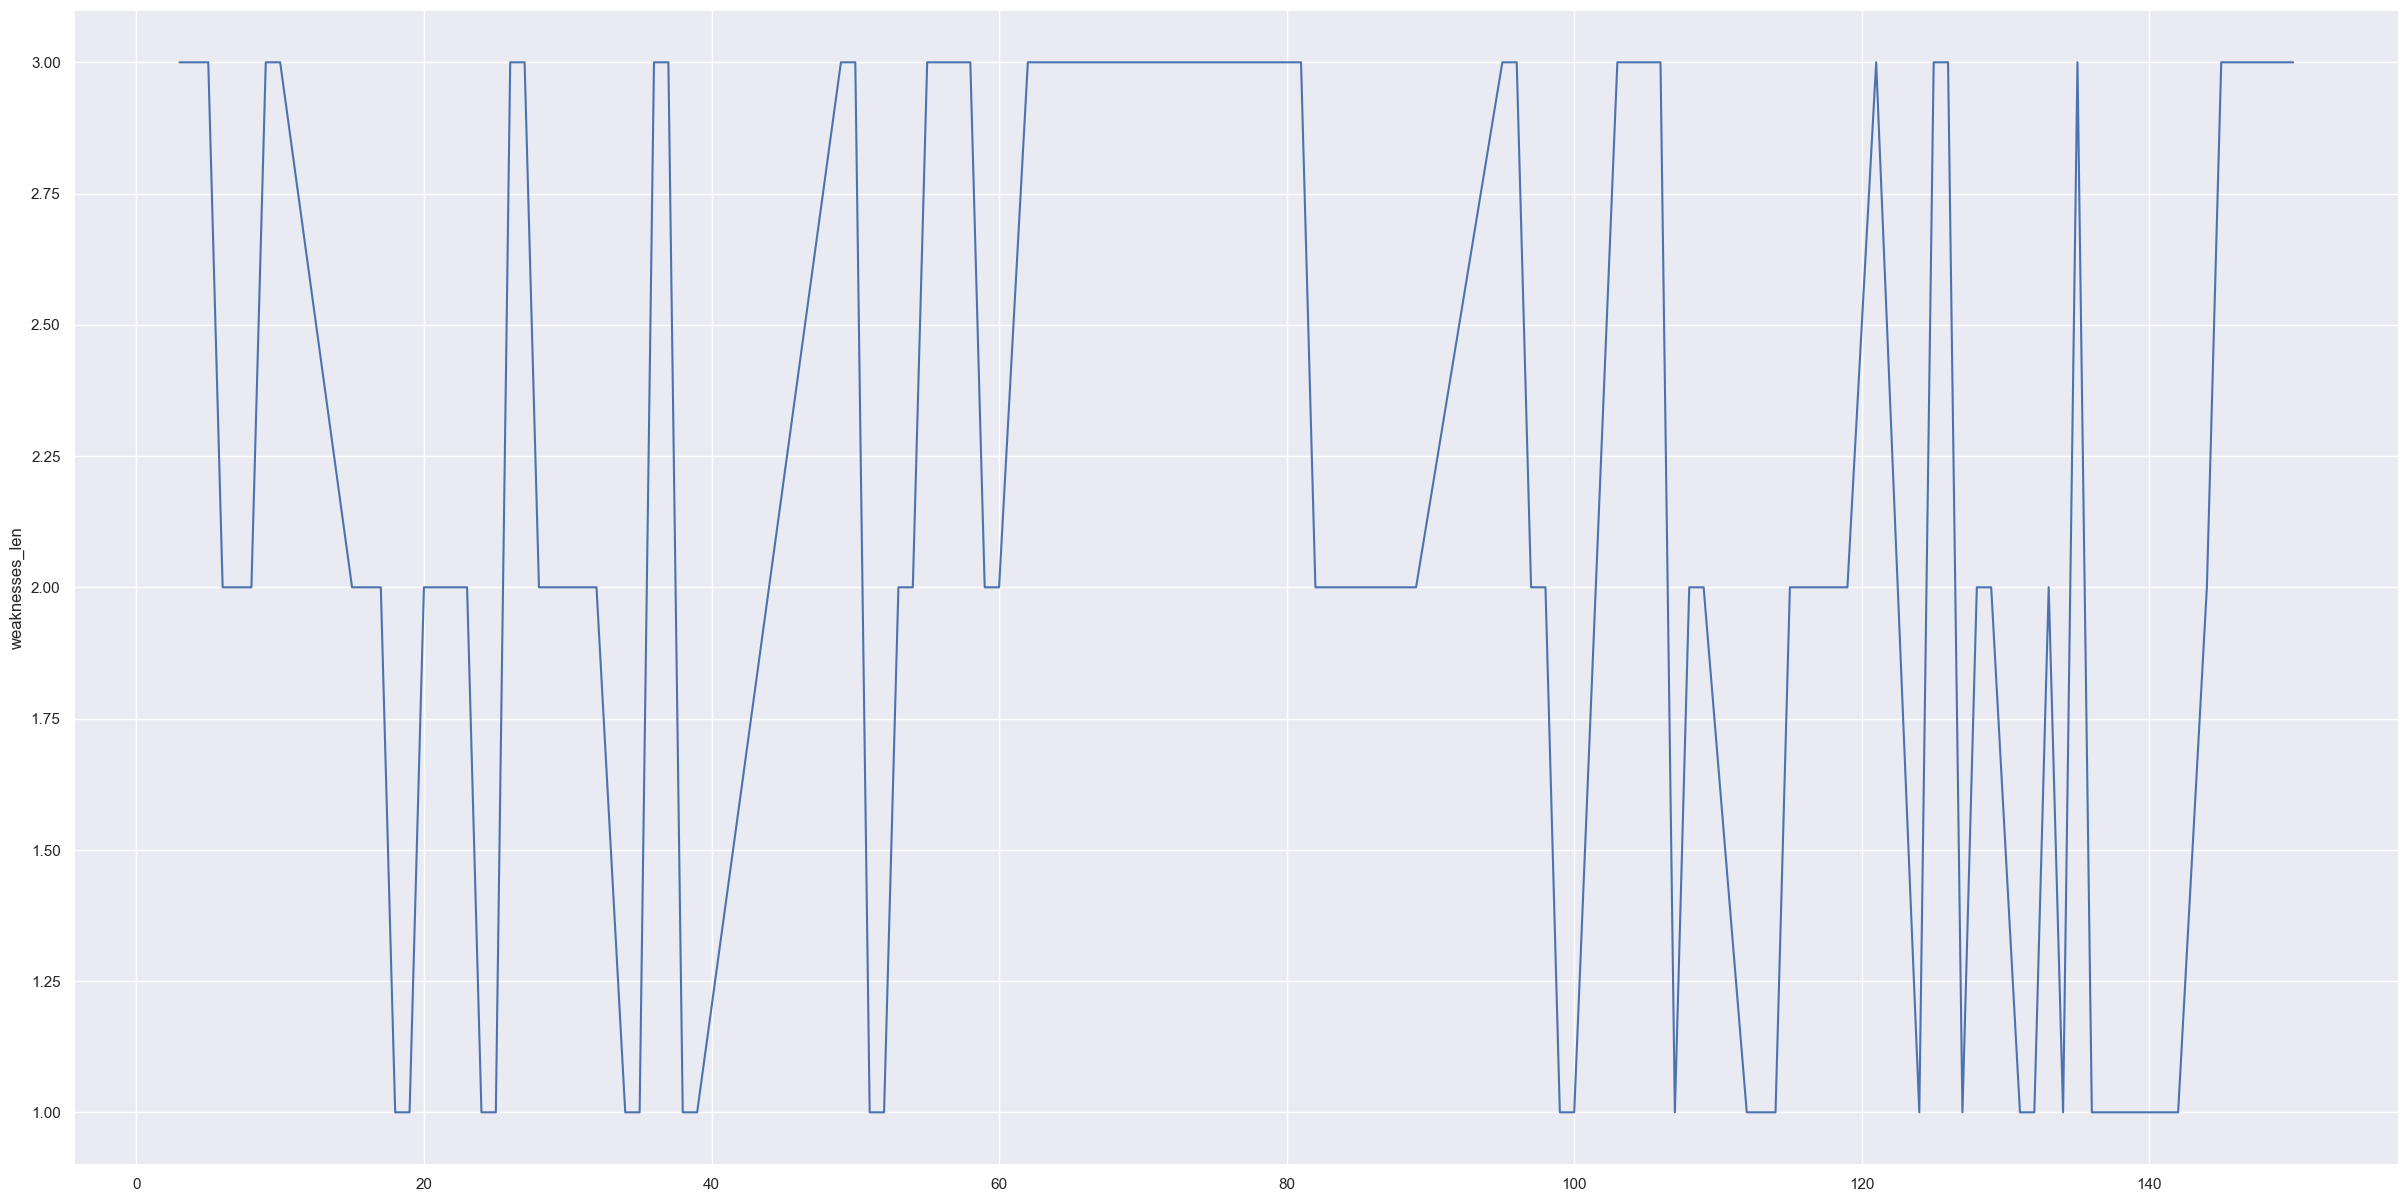

In [28]:
sns.lineplot(df2["weaknesses_len"])

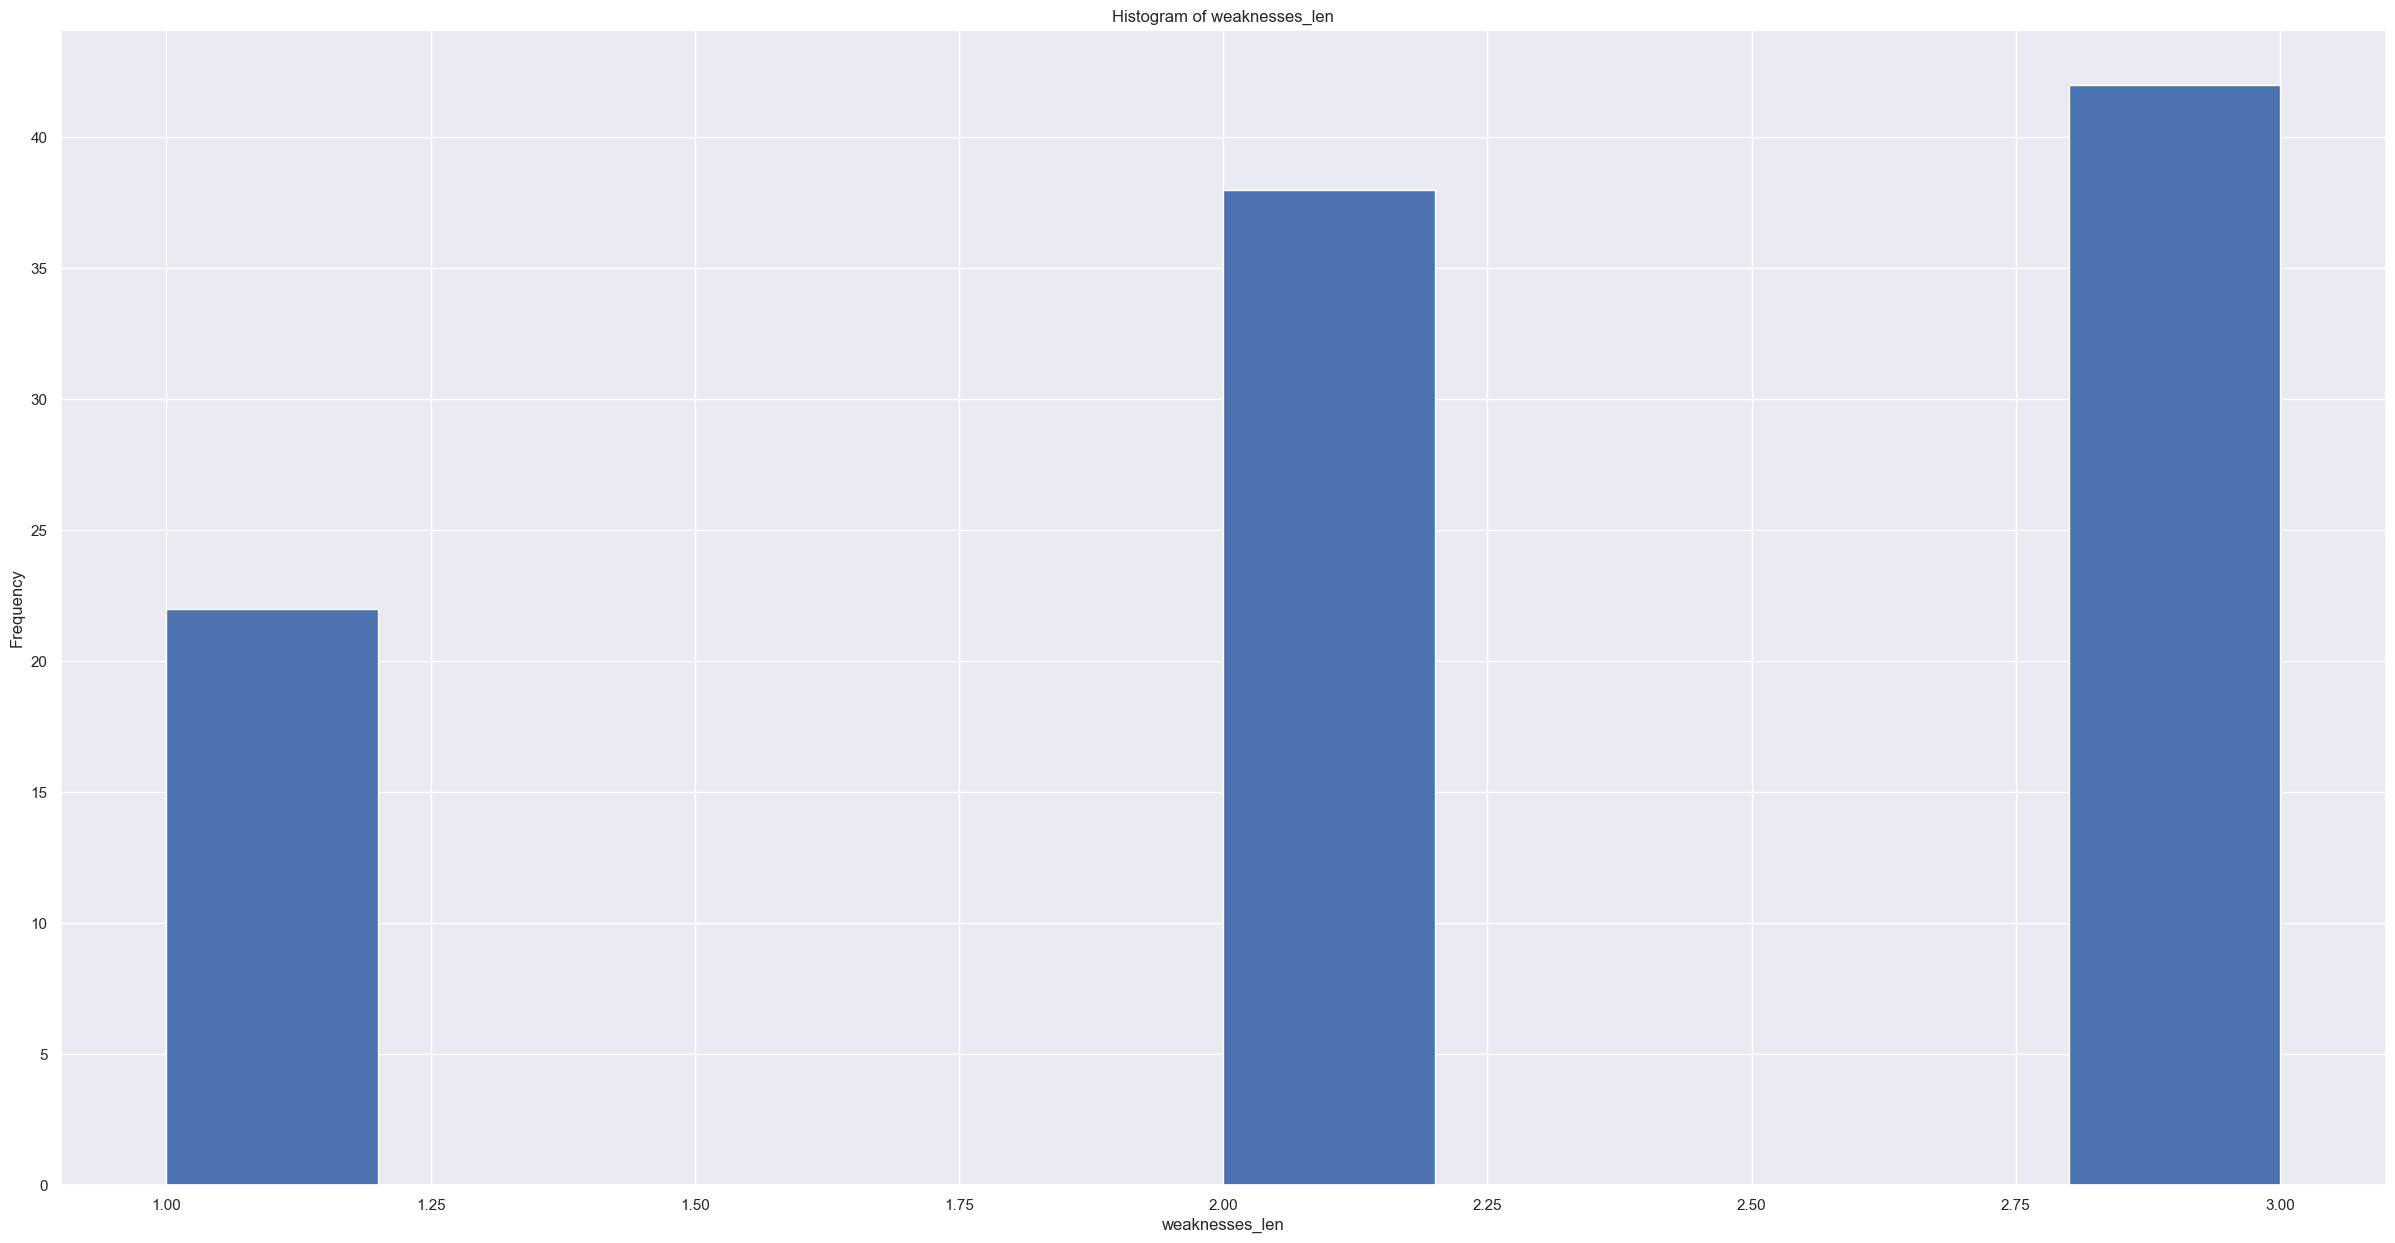

In [52]:
plt.hist(df2["weaknesses_len"], bins=10)
plt.xlabel('weaknesses_len')
plt.ylabel('Frequency')
plt.title('Histogram of weaknesses_len')
plt.show()

In [30]:
df_copy

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_len
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2.0,0.6900,69,00:20:00,[1.58],"[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,NaN,0.0420,4,00:07:00,"[1.2, 1.6]","[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,NaN,NaN,0.0170,1,00:11:30,NaN,"[['Fire', 'Ice', 'Flying', 'Psychic']]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.2530,25,00:08:45,[1.65],"[['Water', 'Ground', 'Rock']]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.0120,1,00:19:00,[1.79],"[['Water', 'Ground', 'Rock']]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80,3.3,Dratini Candy,25.0,10.0,0.3000,30,00:06:41,"[1.83, 1.84]","[['Ice', 'Dragon', 'Fairy']]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99,16.5,Dratini Candy,100.0,NaN,0.0200,2,00:11:57,[2.05],"[['Ice', 'Dragon', 'Fairy']]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21,210.0,Dratini Candy,NaN,NaN,0.0011,0,00:23:38,NaN,"[['Ice', 'Rock', 'Dragon', 'Fairy']]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",4
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Bug', 'Ghost', 'Dark']]",NaN,NaN,3


 ● Get all Pokemons that have no multipliers at all

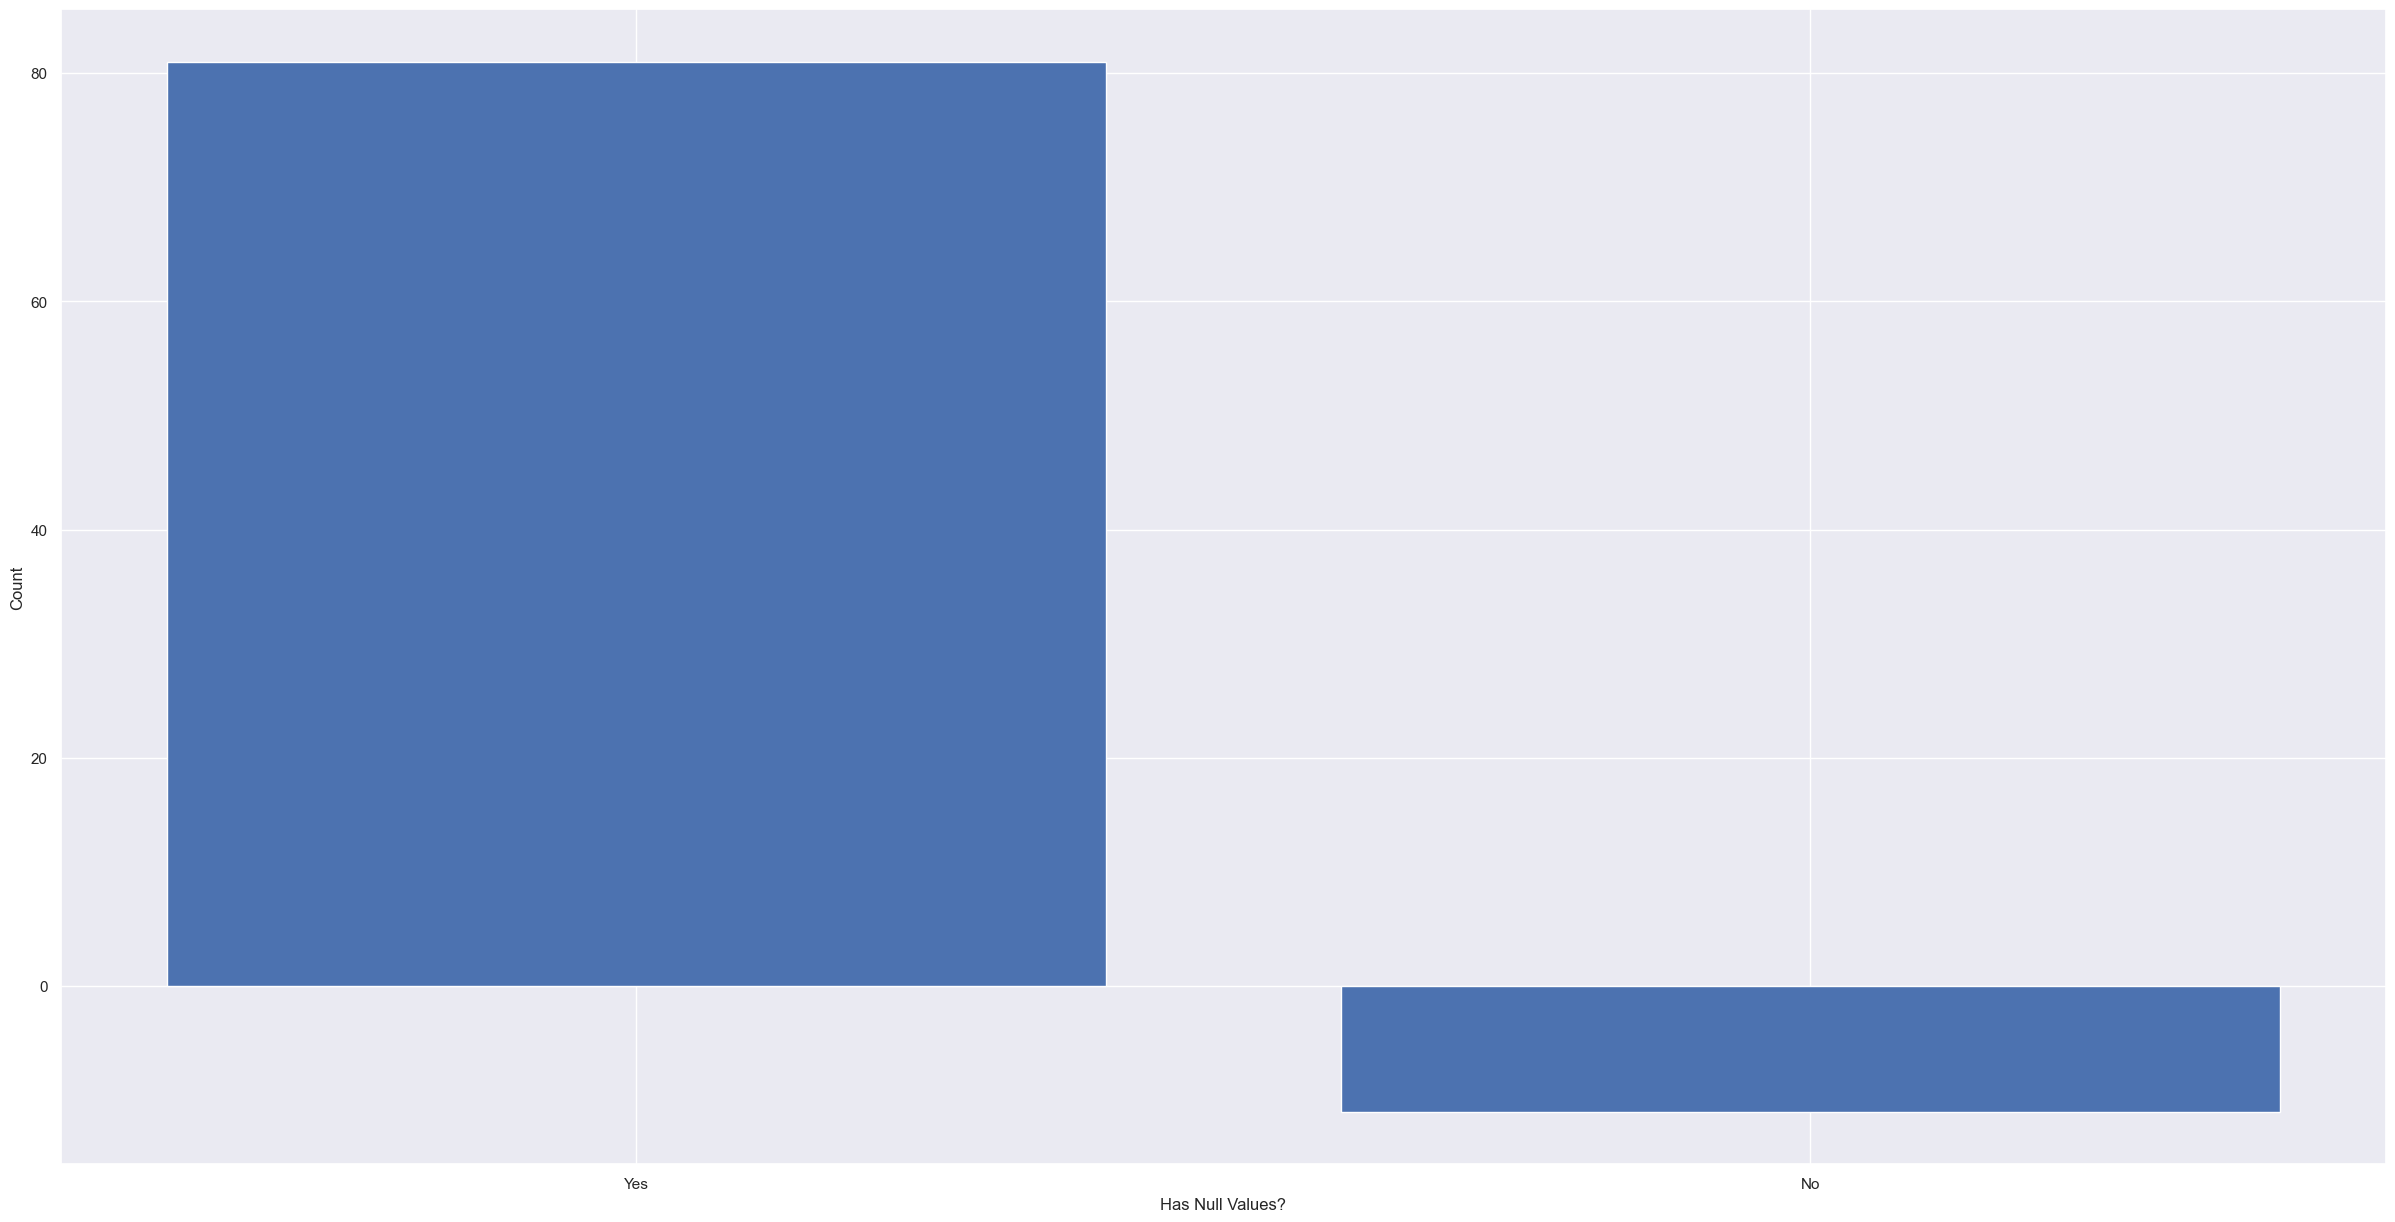

In [31]:
has_null_values = df_copy["multipliers"].isnull().any()

# Plot the graph
if has_null_values:
    plt.bar(x=["Yes","No"], height=[df_copy["multipliers"].isnull().sum(),df_copy["multipliers"].count() - df_copy["multipliers"].isnull().sum()])
    plt.xlabel("Has Null Values?")
    plt.ylabel("Count")
    plt.show()
else:
    print("No null values found")
    


In [32]:
import numpy as np

df3 = df_copy[df_copy['multipliers'].isnull()]

In [33]:
#this much null values we are having regarding multipliers column this is whole data where we have multipliers is null

df3

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_len
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,NaN,NaN,0.0170,1,00:11:30,NaN,"[['Fire', 'Ice', 'Flying', 'Psychic']]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70,90.5,Charmander Candy,NaN,NaN,0.0031,0,00:13:34,NaN,"[['Water', 'Electric', 'Rock']]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':...",3
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60,85.5,Squirtle Candy,NaN,NaN,0.0067,0,00:00:06,NaN,"[['Electric', 'Grass']]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",2
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"['Bug', 'Flying']",1.09,32.0,Caterpie Candy,NaN,NaN,0.0220,2,00:05:23,NaN,"[['Fire', 'Electric', 'Ice', 'Flying', 'Ro...",NaN,"[{'num': '010', 'name': 'Caterpie'}, {'num': '...",5
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"['Bug', 'Poison']",0.99,29.5,Weedle Candy,NaN,NaN,0.0510,5,00:04:50,NaN,"[['Fire', 'Flying', 'Psychic', 'Rock']]",NaN,"[{'num': '013', 'name': 'Weedle'}, {'num': '01...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60,52.6,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Ice', 'Rock']]",NaN,NaN,2
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01,60.0,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Water', 'Electric', 'Rock']]",NaN,NaN,3
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21,210.0,Dratini Candy,NaN,NaN,0.0011,0,00:23:38,NaN,"[['Ice', 'Rock', 'Dragon', 'Fairy']]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",4
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,NaN,NaN,0.0000,0,NaN,NaN,"[['Bug', 'Ghost', 'Dark']]",NaN,NaN,3


Get all Pokemons whose spawn time is less than 300 seconds.


In [34]:
def count_time(df_copy,col):
          list1 = []
          for i in range(len(df_copy[col])):
                    try:
                              list1.append(df_copy[col][i].minute*60)
                    except:
                              list1.append(None)
          return list1
                              
df_copy["spawn_time_seconds"] = count_time(df_copy,"spawn_time")

In [35]:
df_copy["spawn_time_seconds"]

0      1200.0
1       420.0
2       660.0
3       480.0
4      1140.0
        ...  
146     360.0
147     660.0
148    1380.0
149       NaN
150       NaN
Name: spawn_time_seconds, Length: 151, dtype: float64

<Axes: ylabel='spawn_time_seconds'>

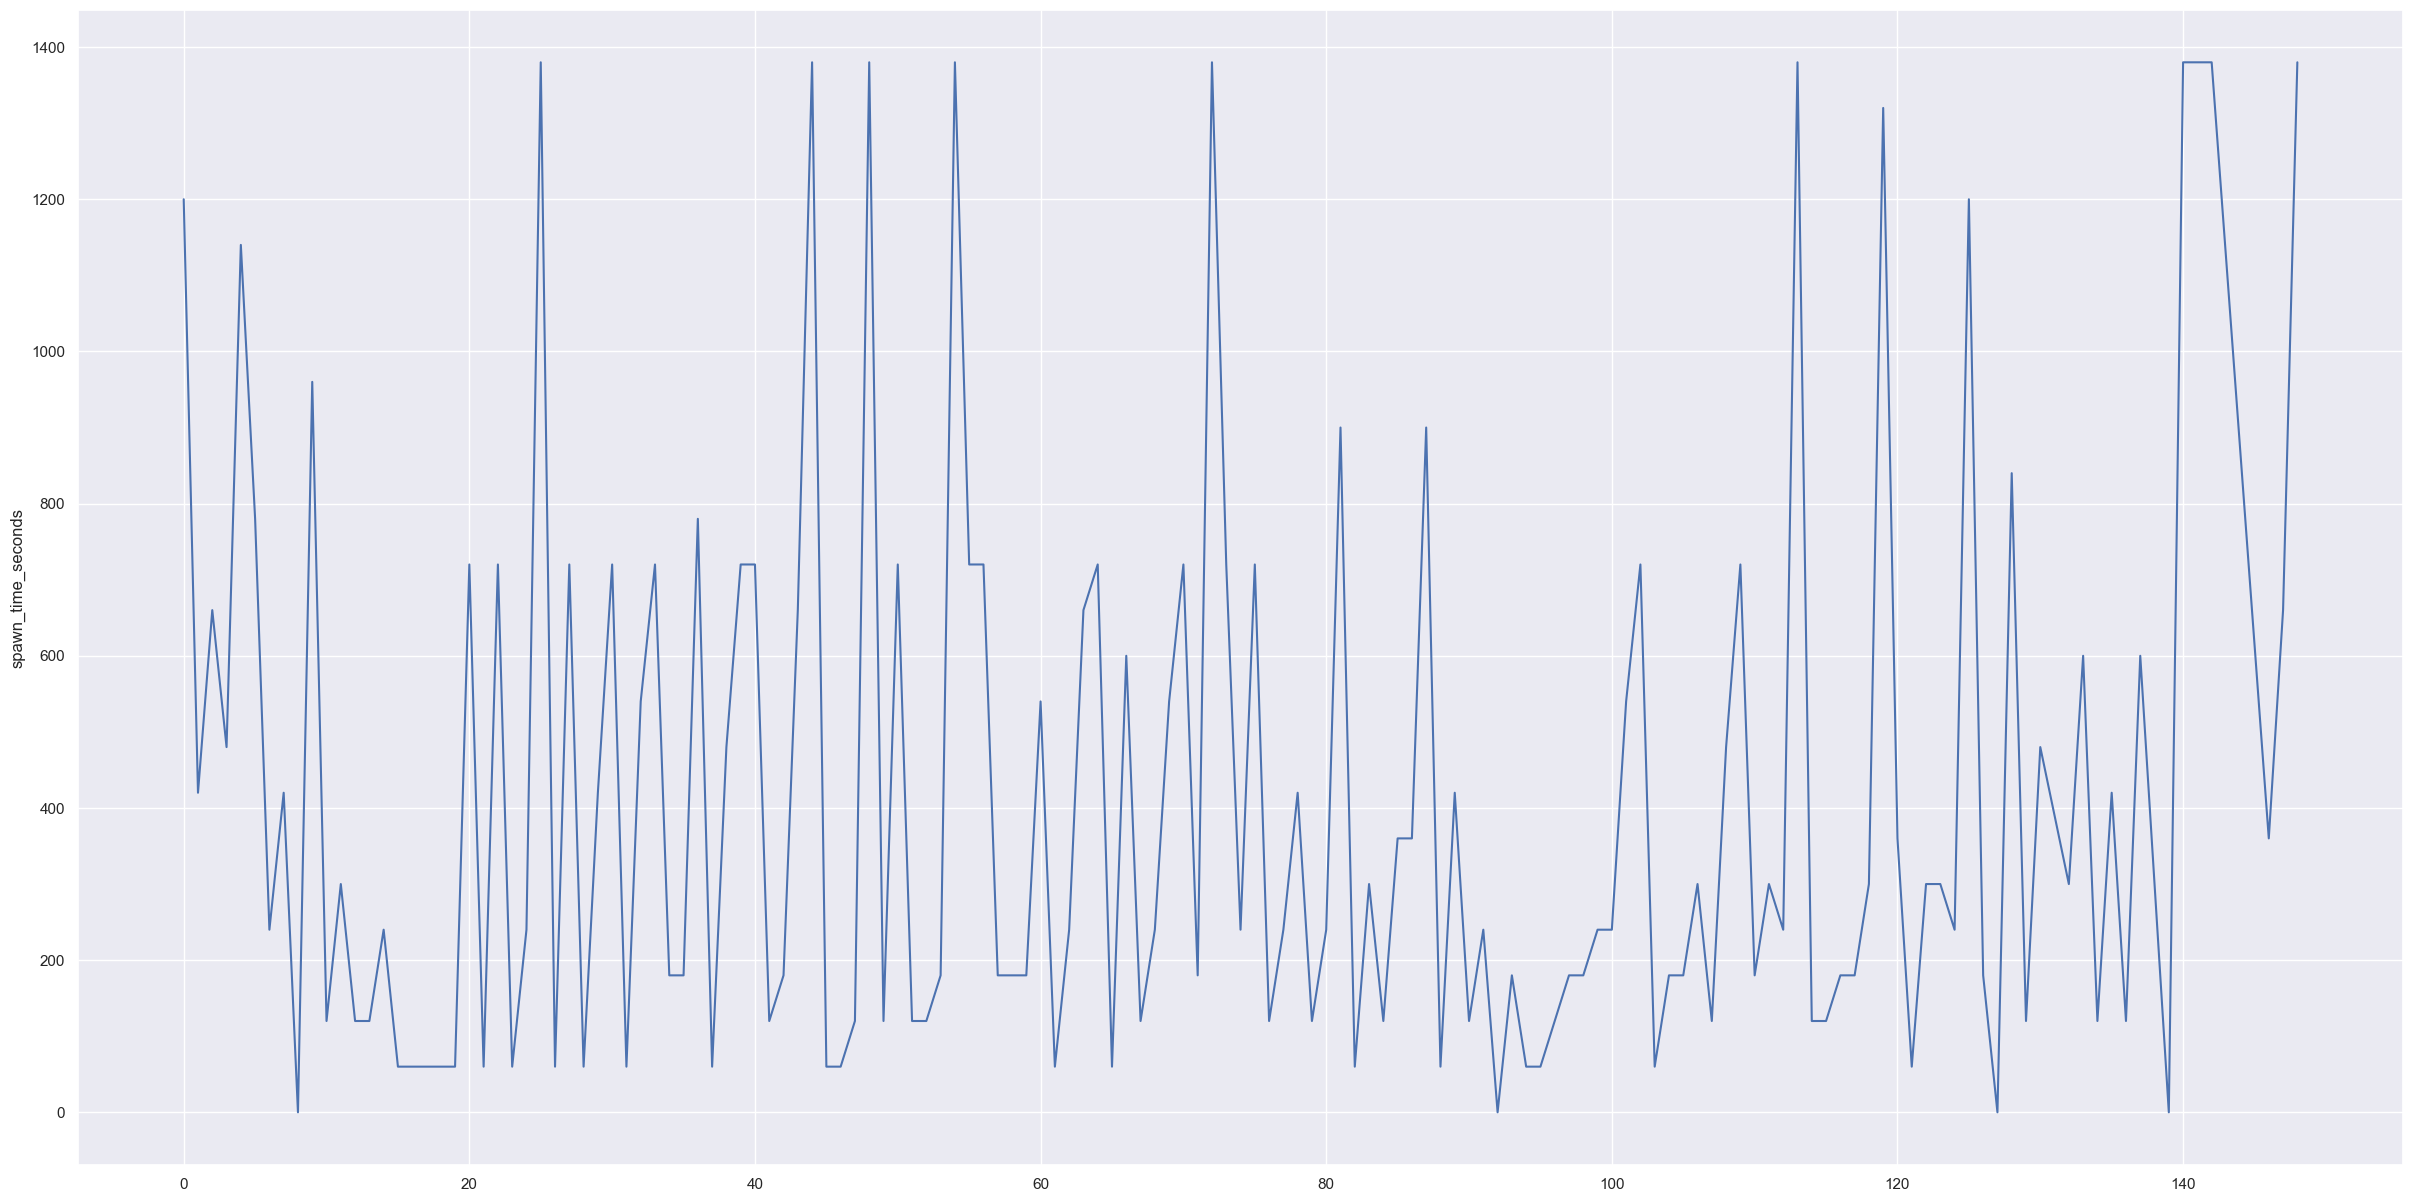

In [36]:
sns.lineplot(df_copy["spawn_time_seconds"])

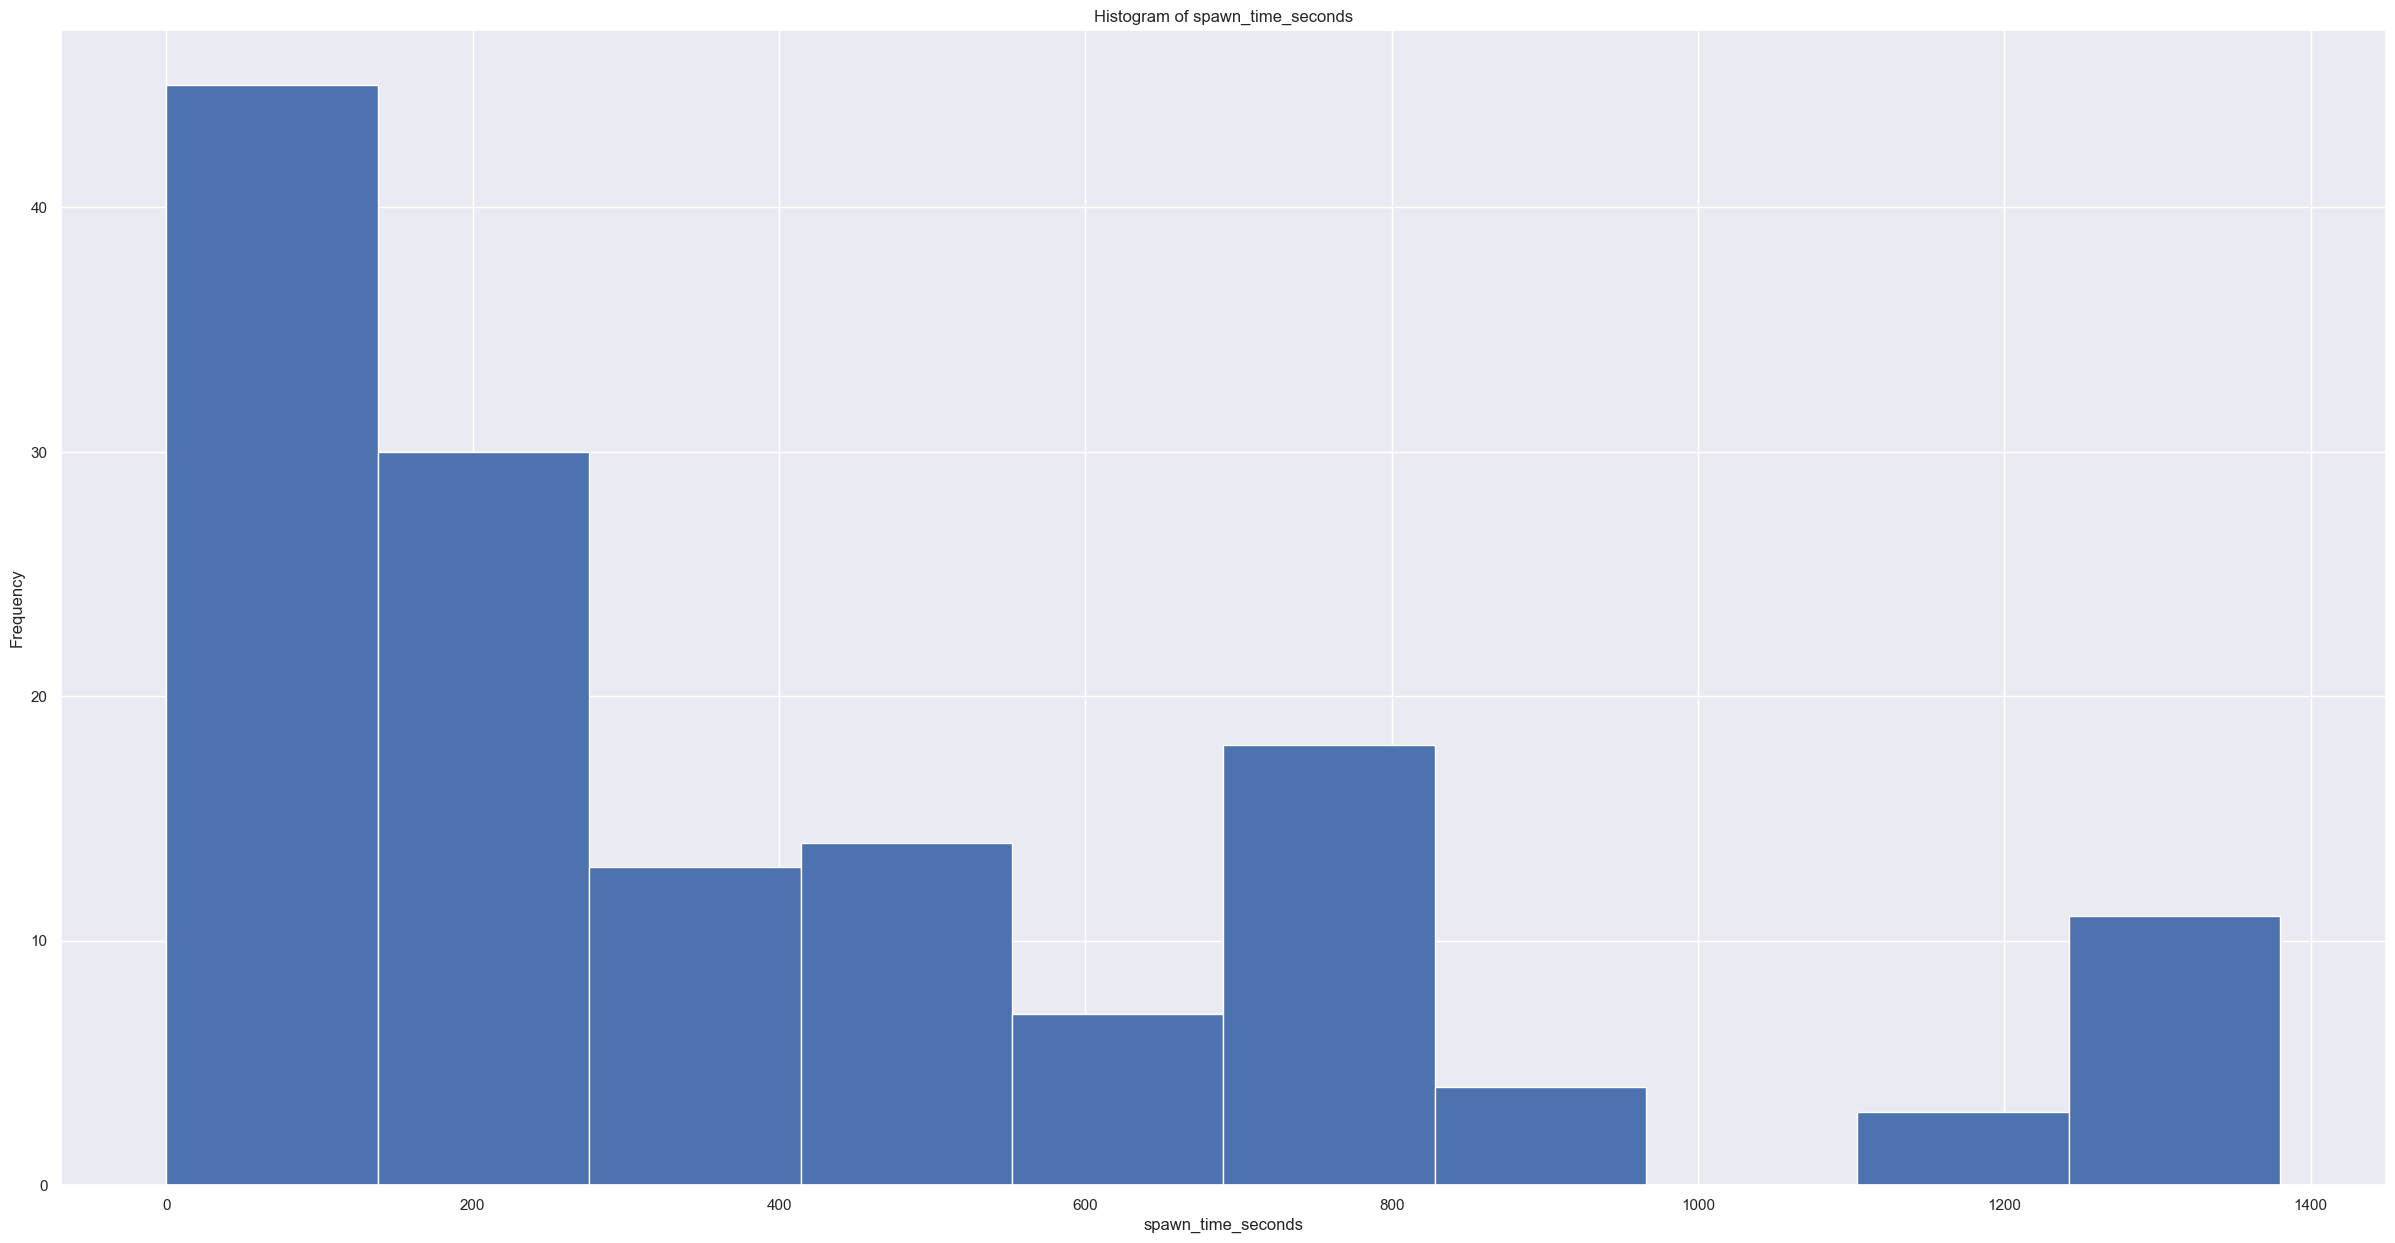

In [53]:
plt.hist(df_copy["spawn_time_seconds"], bins=10)
plt.xlabel('spawn_time_seconds')
plt.ylabel('Frequency')
plt.title('Histogram of spawn_time_seconds')
plt.show()

In [377]:
# here we are checking there are many values where second is greater then 300

In [38]:
df4 = df_copy[df_copy['spawn_time_seconds'] > 300]

In [39]:
df4

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_len,spawn_time_seconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2.0,0.6900,69,00:20:00,[1.58],"[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,1200.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,NaN,0.0420,4,00:07:00,"[1.2, 1.6]","[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,420.0
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,NaN,NaN,0.0170,1,00:11:30,NaN,"[['Fire', 'Ice', 'Flying', 'Psychic']]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,660.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.2530,25,00:08:45,[1.65],"[['Water', 'Ground', 'Rock']]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,480.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.0120,1,00:19:00,[1.79],"[['Water', 'Ground', 'Rock']]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,142,Aerodactyl,http://www.serebii.net/pokemongo/pokemon/142.png,"['Rock', 'Flying']",1.80,59.0,None,NaN,10.0,0.0180,1,00:23:40,NaN,"[['Water', 'Electric', 'Ice', 'Rock', 'Ste...",NaN,NaN,5,1380.0
142,143,143,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,['Normal'],2.11,460.0,None,NaN,10.0,0.0160,1,00:23:40,NaN,[['Fighting']],NaN,NaN,1,1380.0
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80,3.3,Dratini Candy,25.0,10.0,0.3000,30,00:06:41,"[1.83, 1.84]","[['Ice', 'Dragon', 'Fairy']]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3,360.0
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99,16.5,Dratini Candy,100.0,NaN,0.0200,2,00:11:57,[2.05],"[['Ice', 'Dragon', 'Fairy']]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3,660.0


<Axes: ylabel='spawn_time_seconds'>

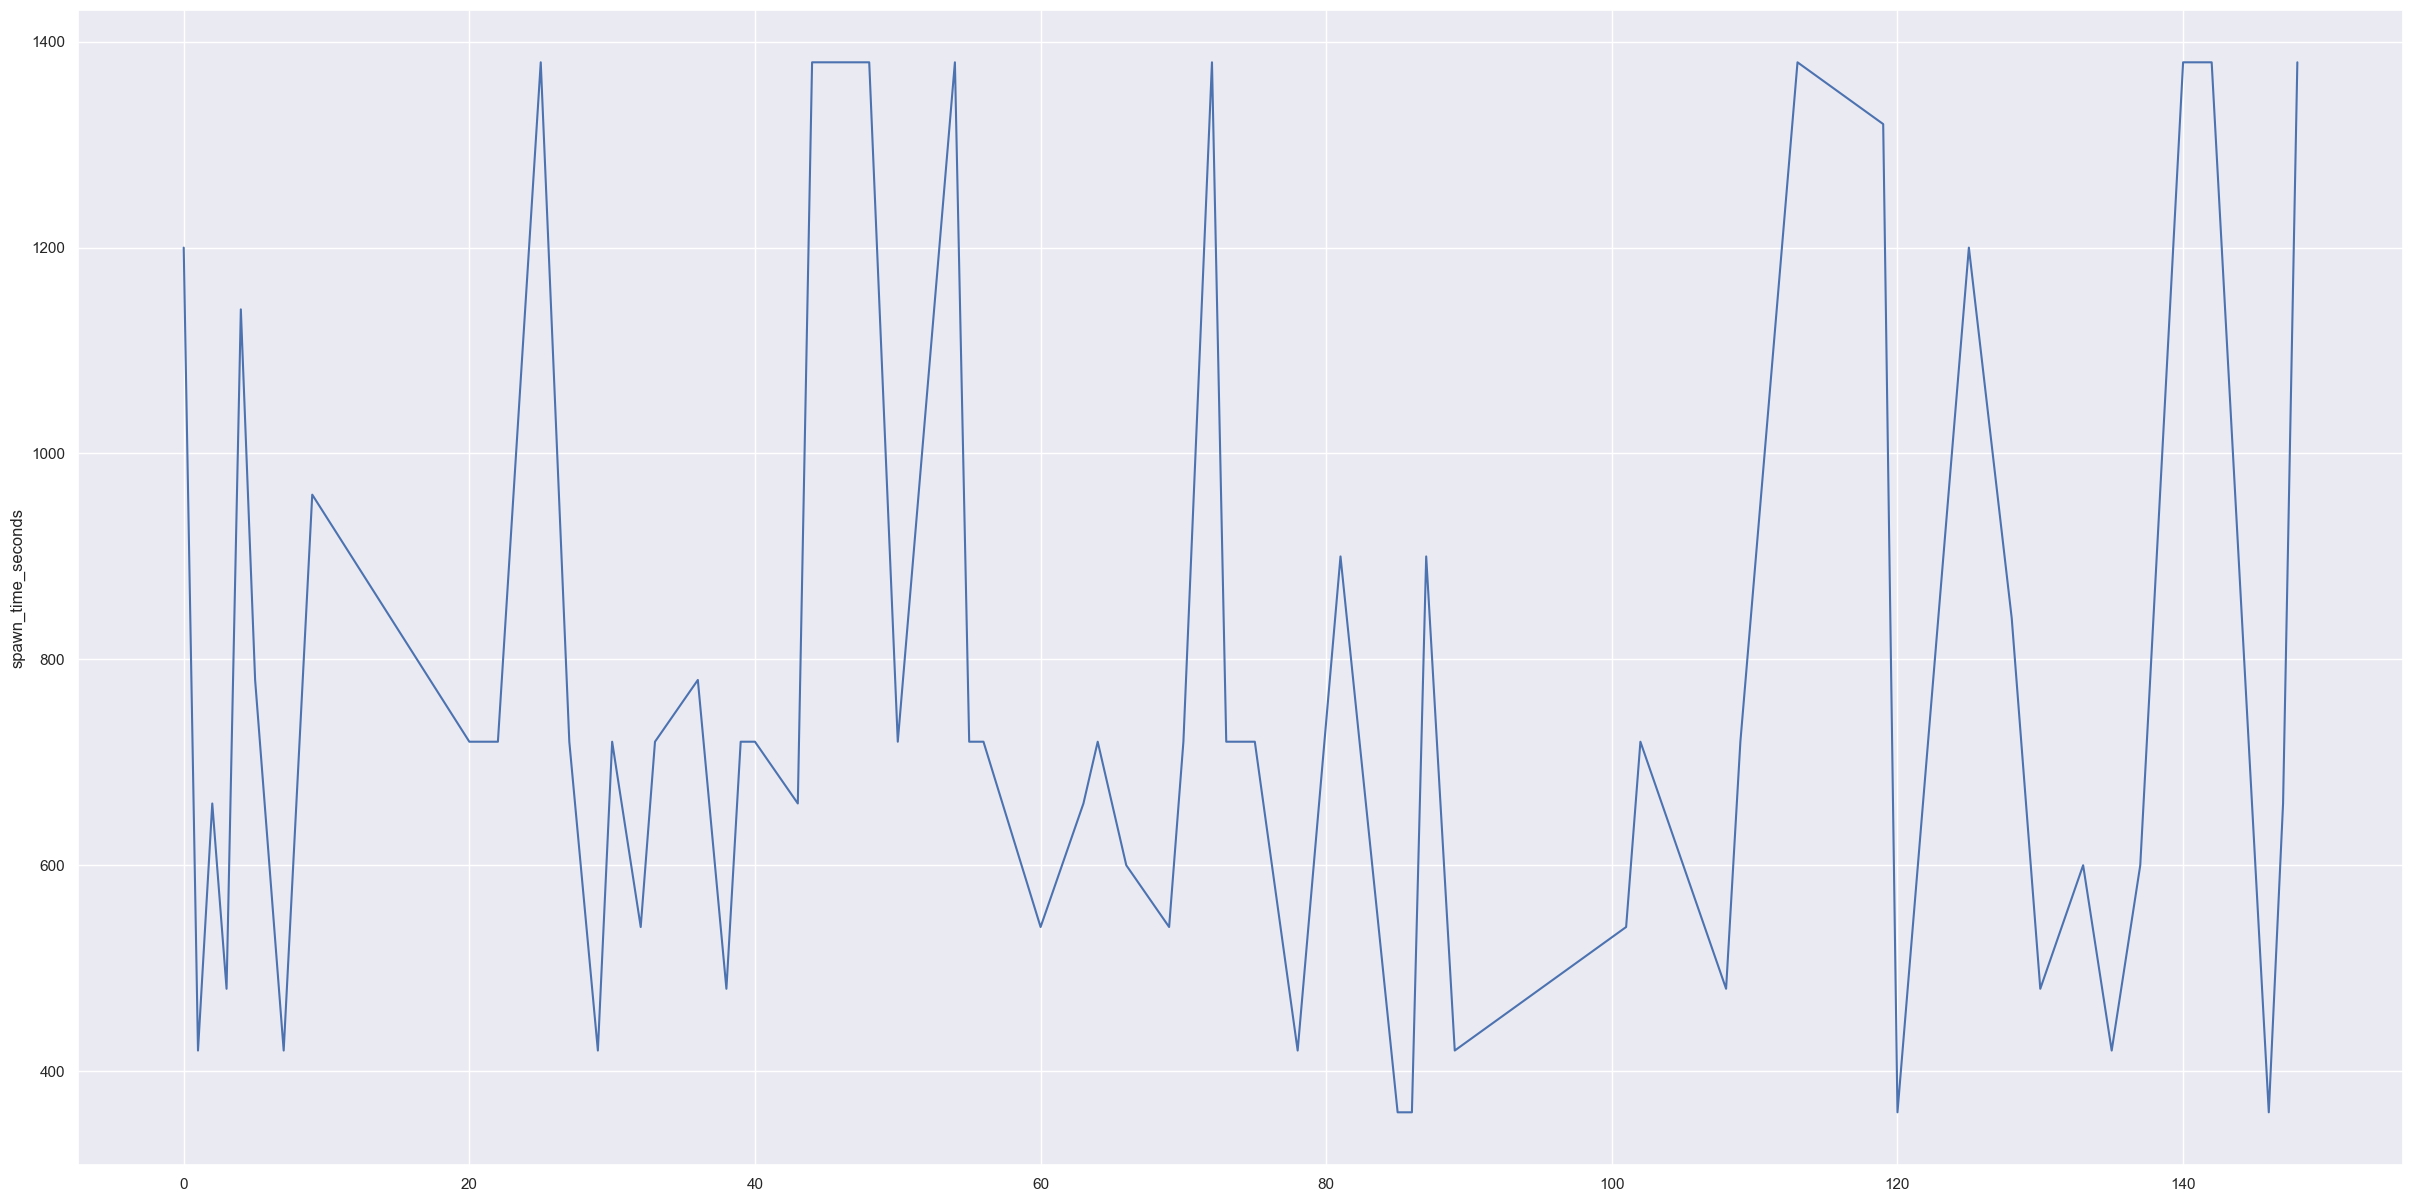

In [371]:
sns.lineplot(df4["spawn_time_seconds"])

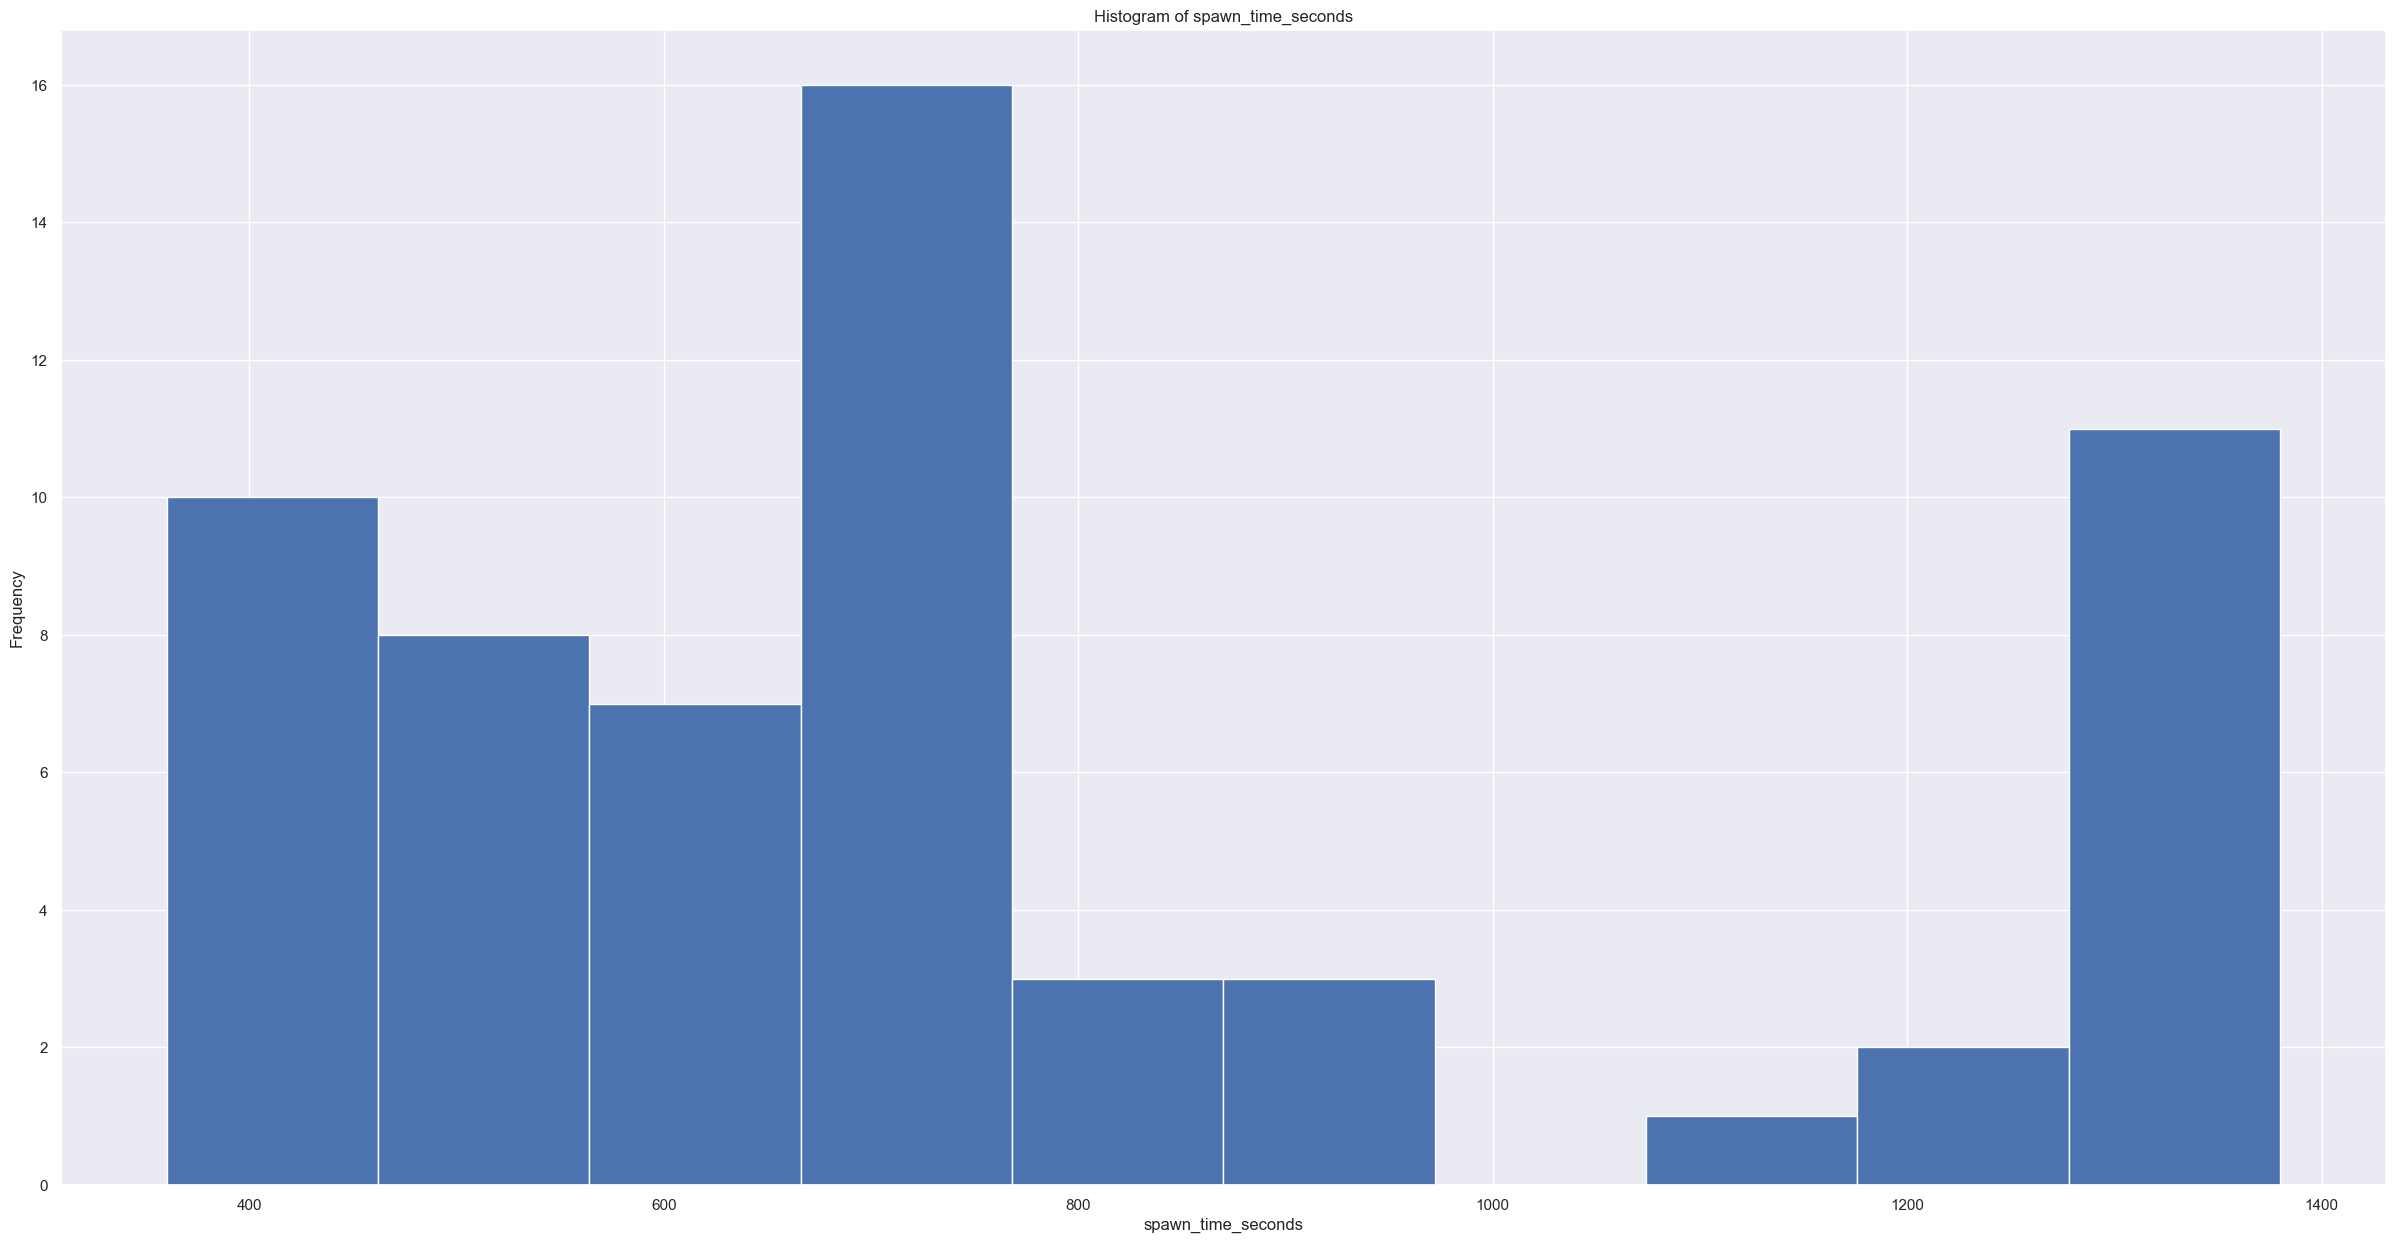

In [54]:
plt.hist(df4["spawn_time_seconds"], bins=10)
plt.xlabel('spawn_time_seconds')
plt.ylabel('Frequency')
plt.title('Histogram of spawn_time_seconds')
plt.show()

In [382]:
# this values are greater then 300 seconds in spawn_time column

● Get all Pokemons that do not have more than 2 evolutions

In [372]:
df_copy["next_evolution"]

0      [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...
1                   [{'num': '003', 'name': 'Venusaur'}]
2                                                    NaN
3      [{'num': '005', 'name': 'Charmeleon'}, {'num':...
4                  [{'num': '006', 'name': 'Charizard'}]
                             ...                        
146    [{'num': '148', 'name': 'Dragonair'}, {'num': ...
147                [{'num': '149', 'name': 'Dragonite'}]
148                                                  NaN
149                                                  NaN
150                                                  NaN
Name: next_evolution, Length: 151, dtype: object

In [42]:
import ast

def test_func(df_copy,col):
          list1 = []
          for i in range(len(df_copy[col])):
                    try:
                              list_dict = ast.literal_eval(df_copy[col][i])
                              list1.append(len(list_dict))
                    except:
                              list1.append(None)
          return list1

obj = test_func(df_copy,"next_evolution")
df_copy['len_evolution'] = obj

In [43]:
df_copy['len_evolution']

0      2.0
1      1.0
2      NaN
3      2.0
4      1.0
      ... 
146    2.0
147    1.0
148    NaN
149    NaN
150    NaN
Name: len_evolution, Length: 151, dtype: float64

<Axes: ylabel='len_evolution'>

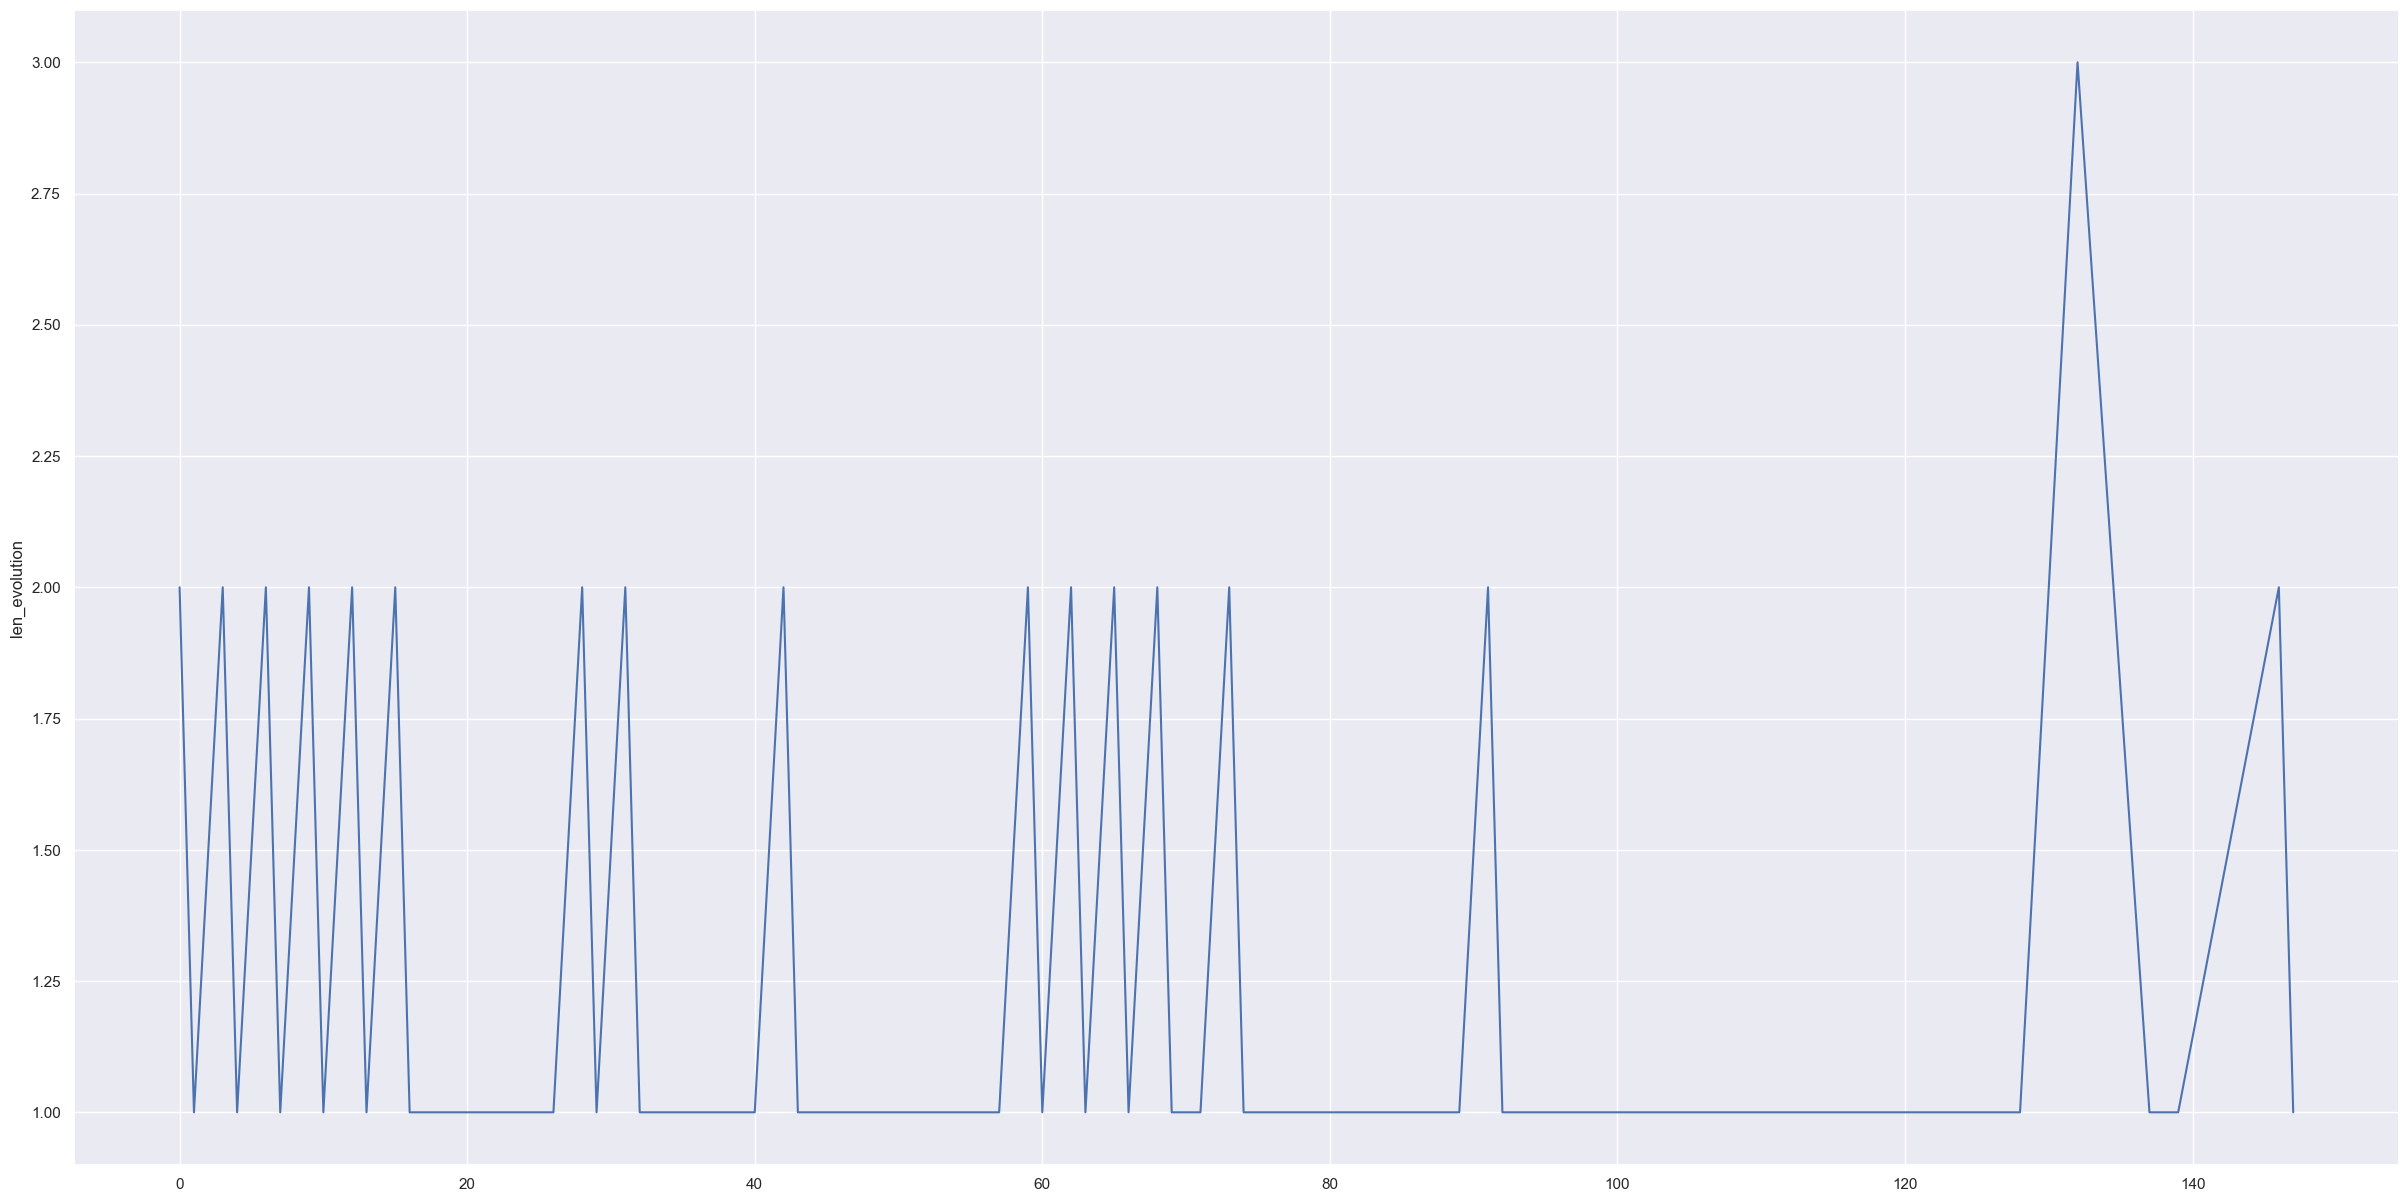

In [44]:
sns.lineplot(df_copy["len_evolution"])

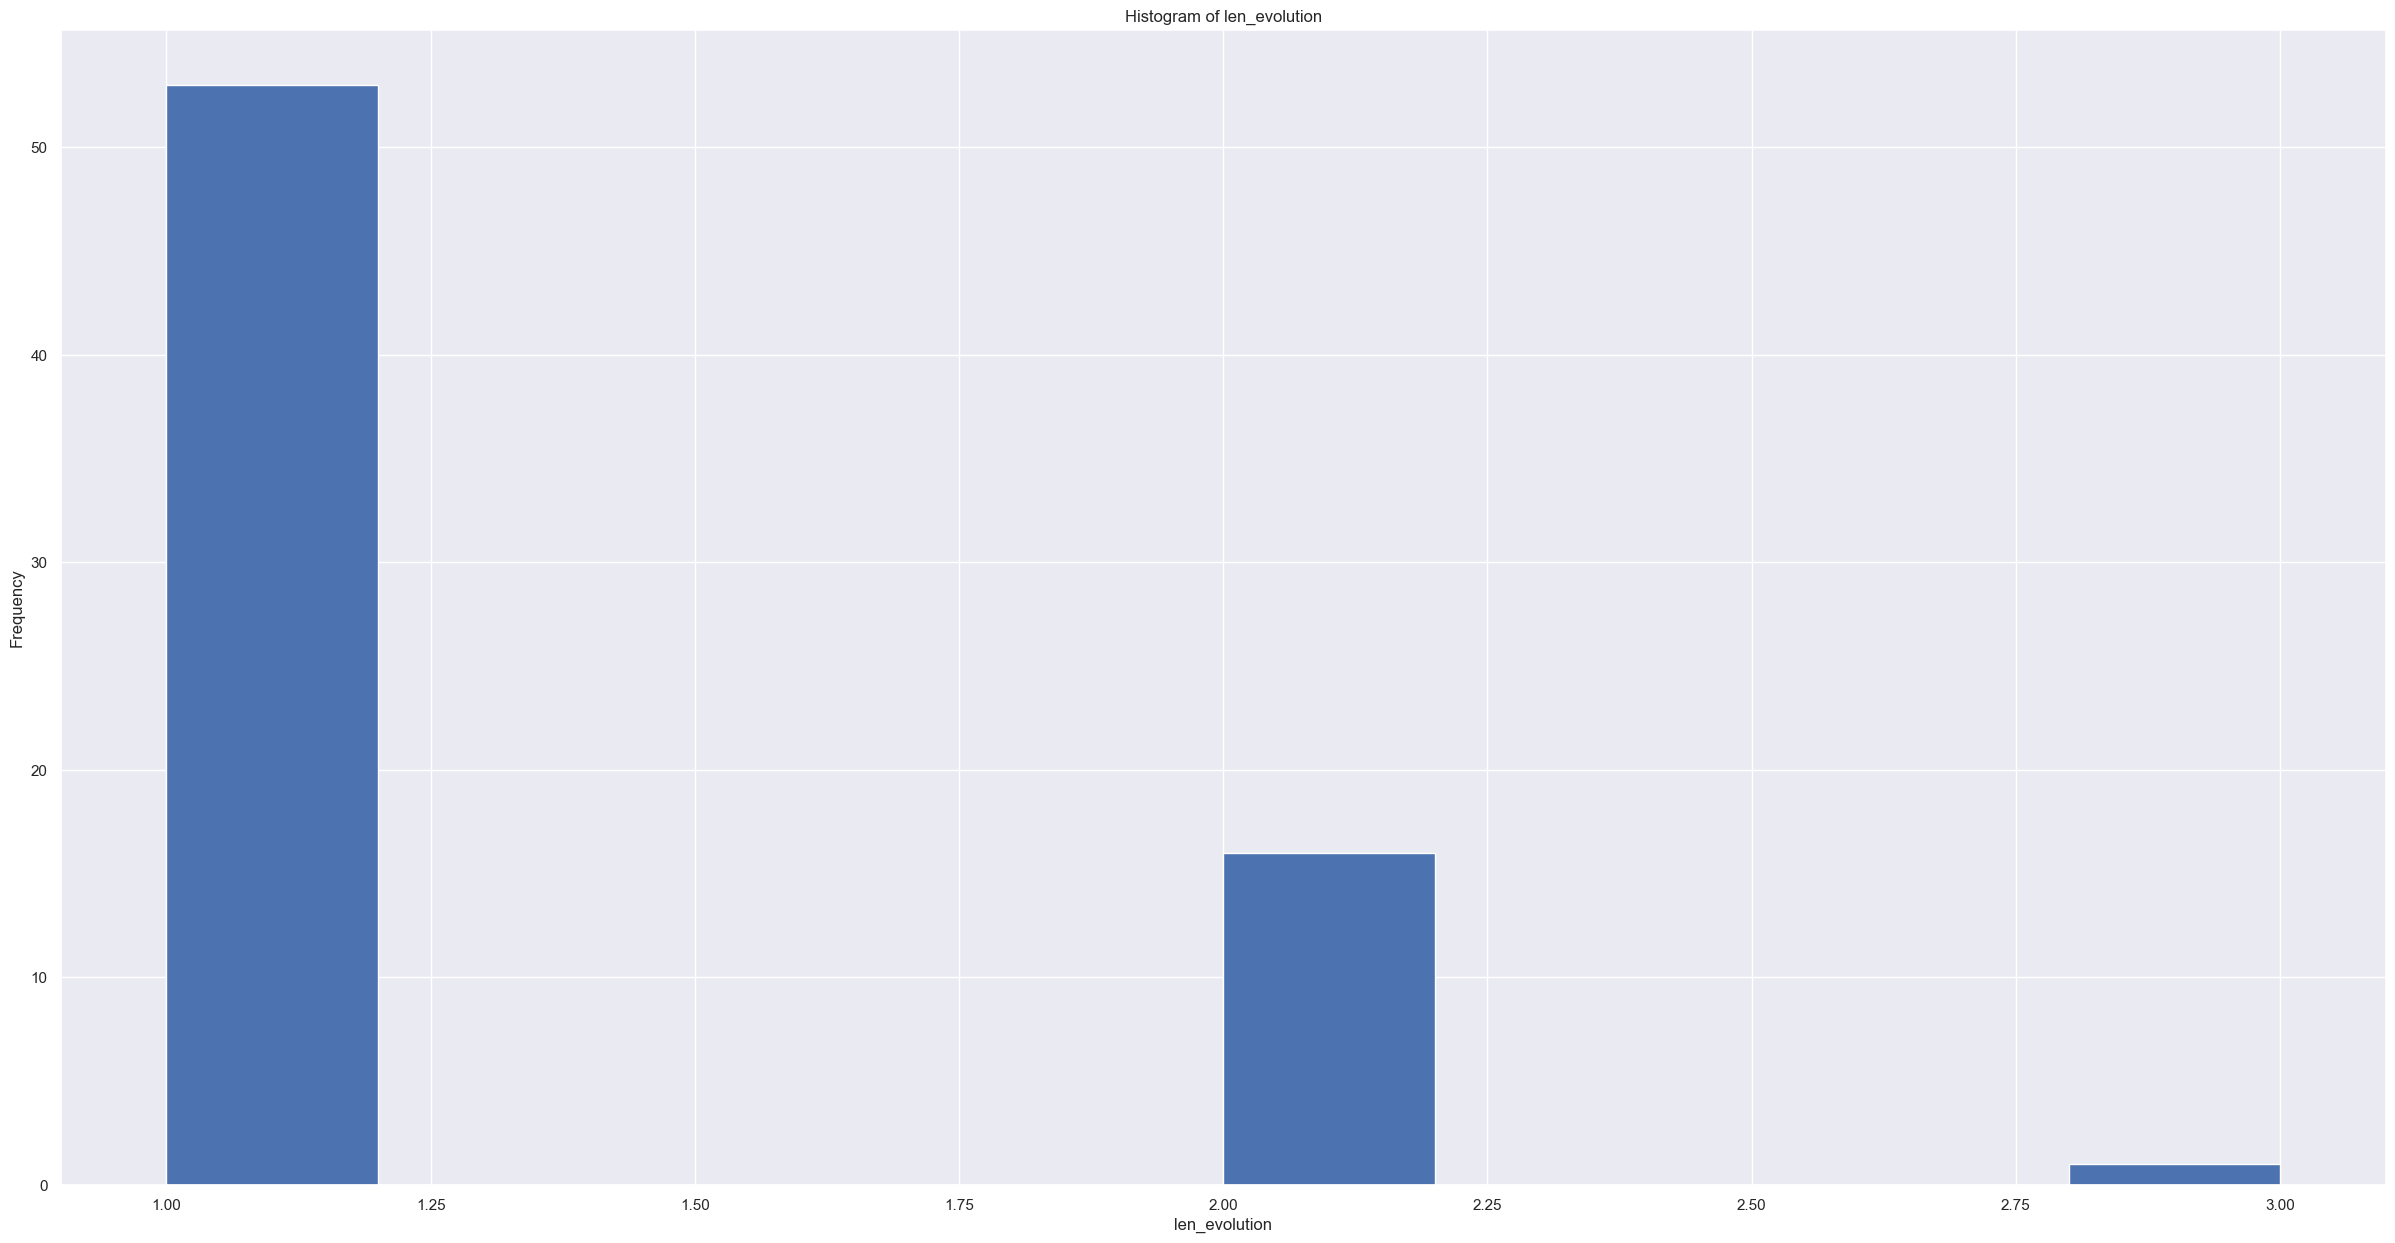

In [55]:
plt.hist(df_copy["len_evolution"], bins=10)
plt.xlabel('len_evolution')
plt.ylabel('Frequency')
plt.title('Histogram of len_evolution')
plt.show()

In [444]:
# Here i observe only one value is having a more then 2 evolution in next_evolution column

In [46]:
df5 = df_copy[df_copy['len_evolution'] <= 2]


In [47]:
df5

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknesses_len,spawn_time_seconds,len_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2.0,0.690,69,00:20:00,[1.58],"[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,1200.0,2.0
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,NaN,0.042,4,00:07:00,"[1.2, 1.6]","[['Fire', 'Ice', 'Flying', 'Psychic']]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,420.0,1.0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25.0,2.0,0.253,25,00:08:45,[1.65],"[['Water', 'Ground', 'Rock']]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,480.0,2.0
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100.0,NaN,0.012,1,00:19:00,[1.79],"[['Water', 'Ground', 'Rock']]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,1140.0,1.0
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51,9.0,Squirtle Candy,25.0,2.0,0.580,58,00:04:25,[2.1],"[['Electric', 'Grass']]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,2,240.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,129,Magikarp,http://www.serebii.net/pokemongo/pokemon/129.png,['Water'],0.89,10.0,Magikarp Candy,400.0,2.0,4.780,478,00:14:26,"[10.1, 11.8]","[['Electric', 'Grass']]","[{'num': '130', 'name': 'Gyarados'}]",NaN,2,840.0,1.0
137,138,138,Omanyte,http://www.serebii.net/pokemongo/pokemon/138.png,"['Rock', 'Water']",0.41,7.5,Omanyte Candy,50.0,10.0,0.140,14,00:10:23,[2.12],"[['Electric', 'Grass', 'Fighting', 'Ground']]","[{'num': '139', 'name': 'Omastar'}]",NaN,4,600.0,1.0
139,140,140,Kabuto,http://www.serebii.net/pokemongo/pokemon/140.png,"['Rock', 'Water']",0.51,11.5,Kabuto Candy,50.0,10.0,0.100,10,00:00:05,"[1.97, 2.37]","[['Electric', 'Grass', 'Fighting', 'Ground']]","[{'num': '141', 'name': 'Kabutops'}]",NaN,4,0.0,1.0
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80,3.3,Dratini Candy,25.0,10.0,0.300,30,00:06:41,"[1.83, 1.84]","[['Ice', 'Dragon', 'Fairy']]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3,360.0,2.0


<Axes: ylabel='len_evolution'>

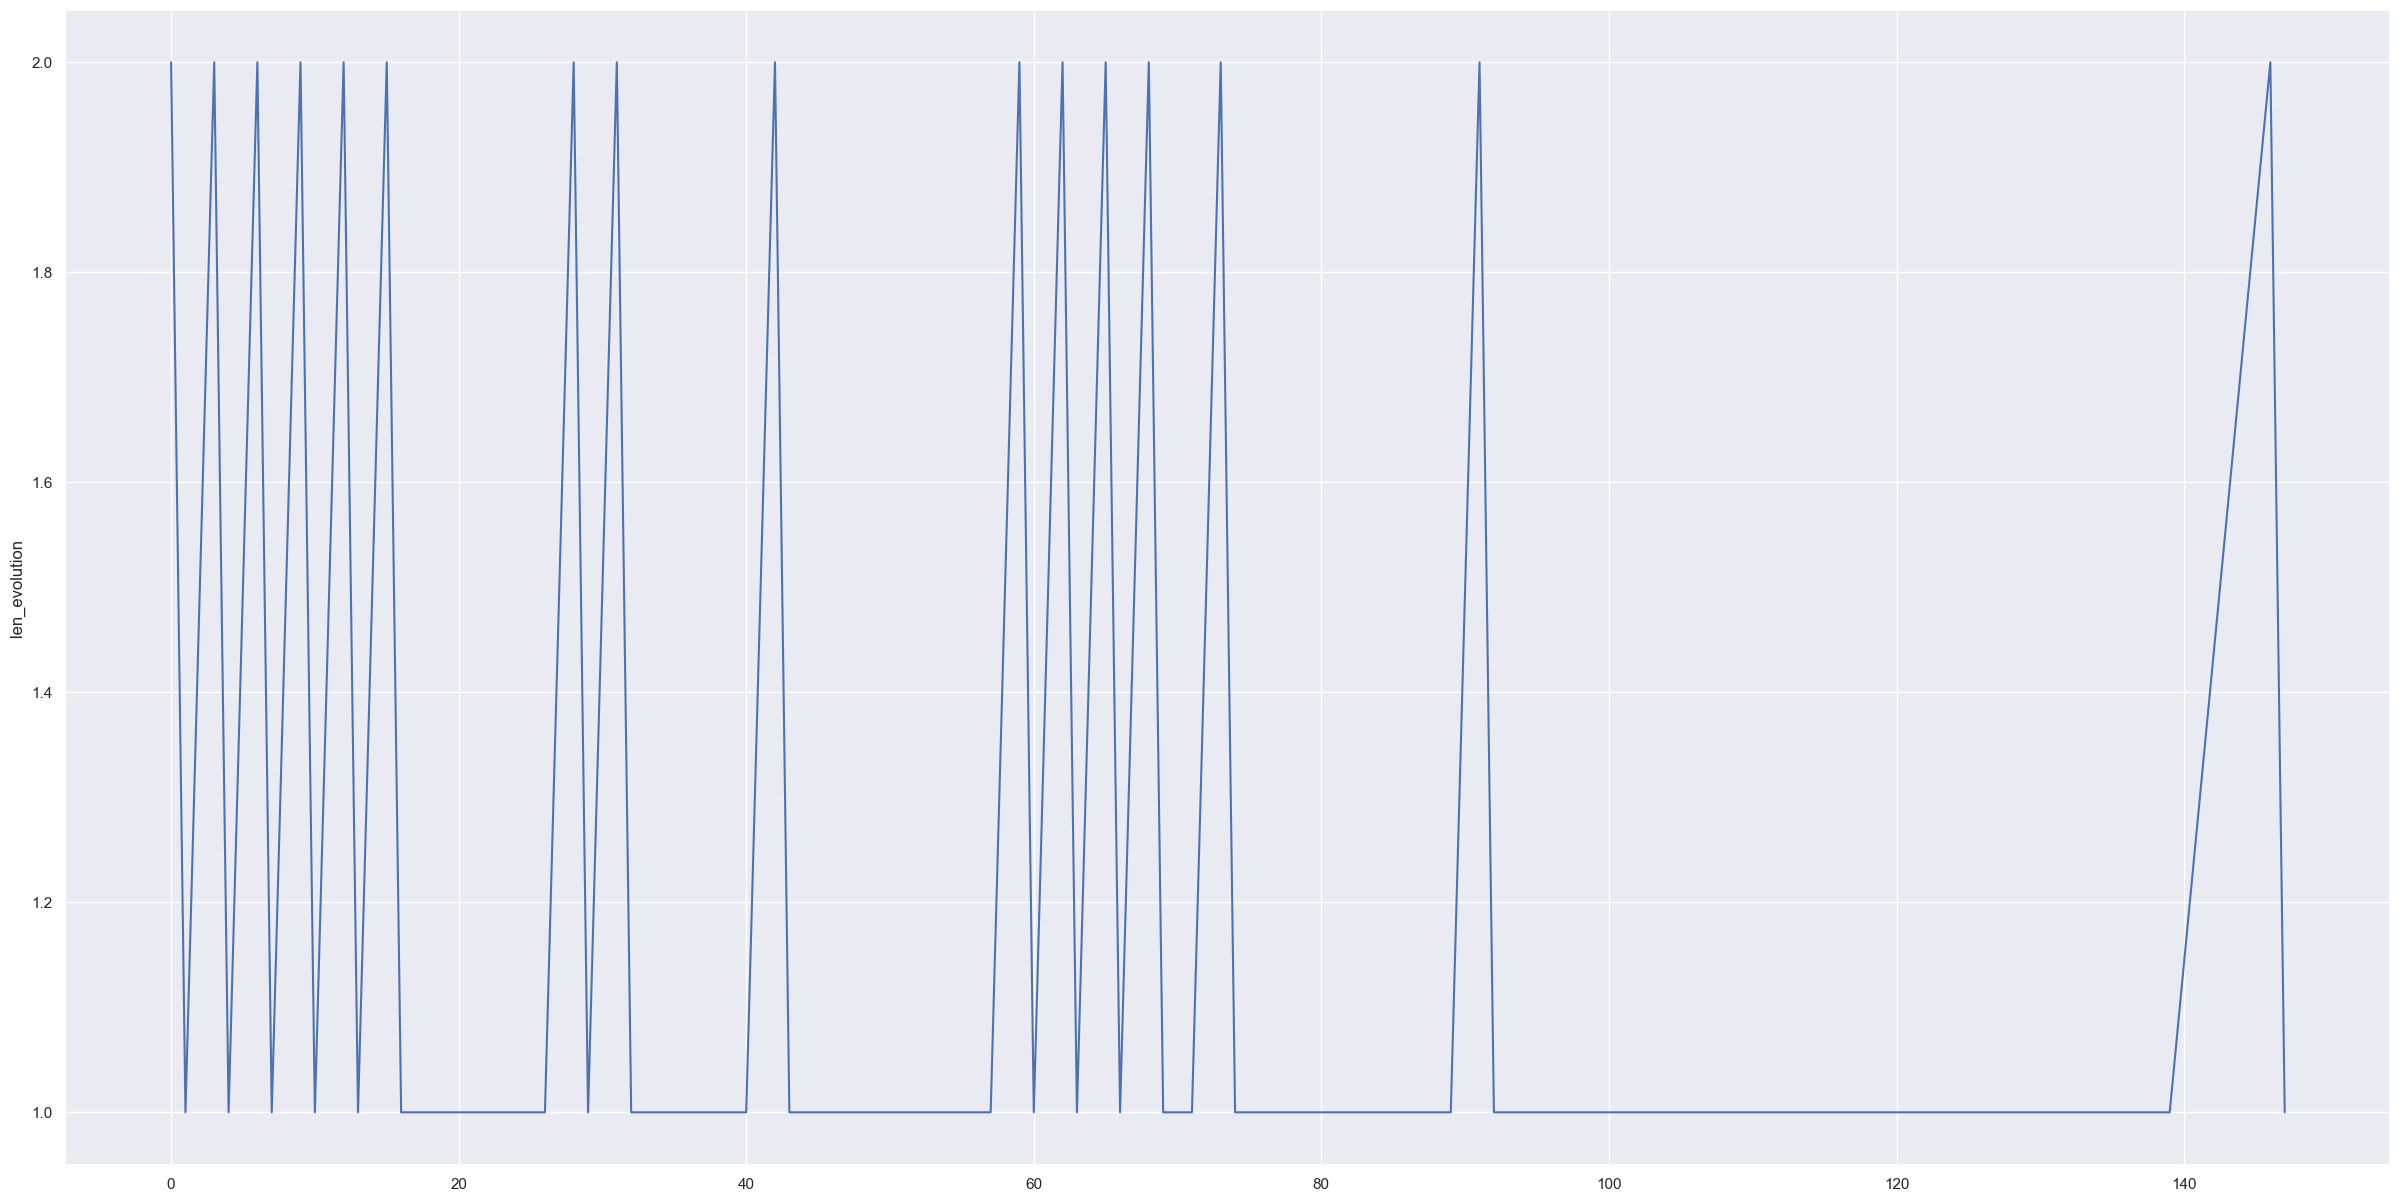

In [48]:
sns.lineplot(df5["len_evolution"])

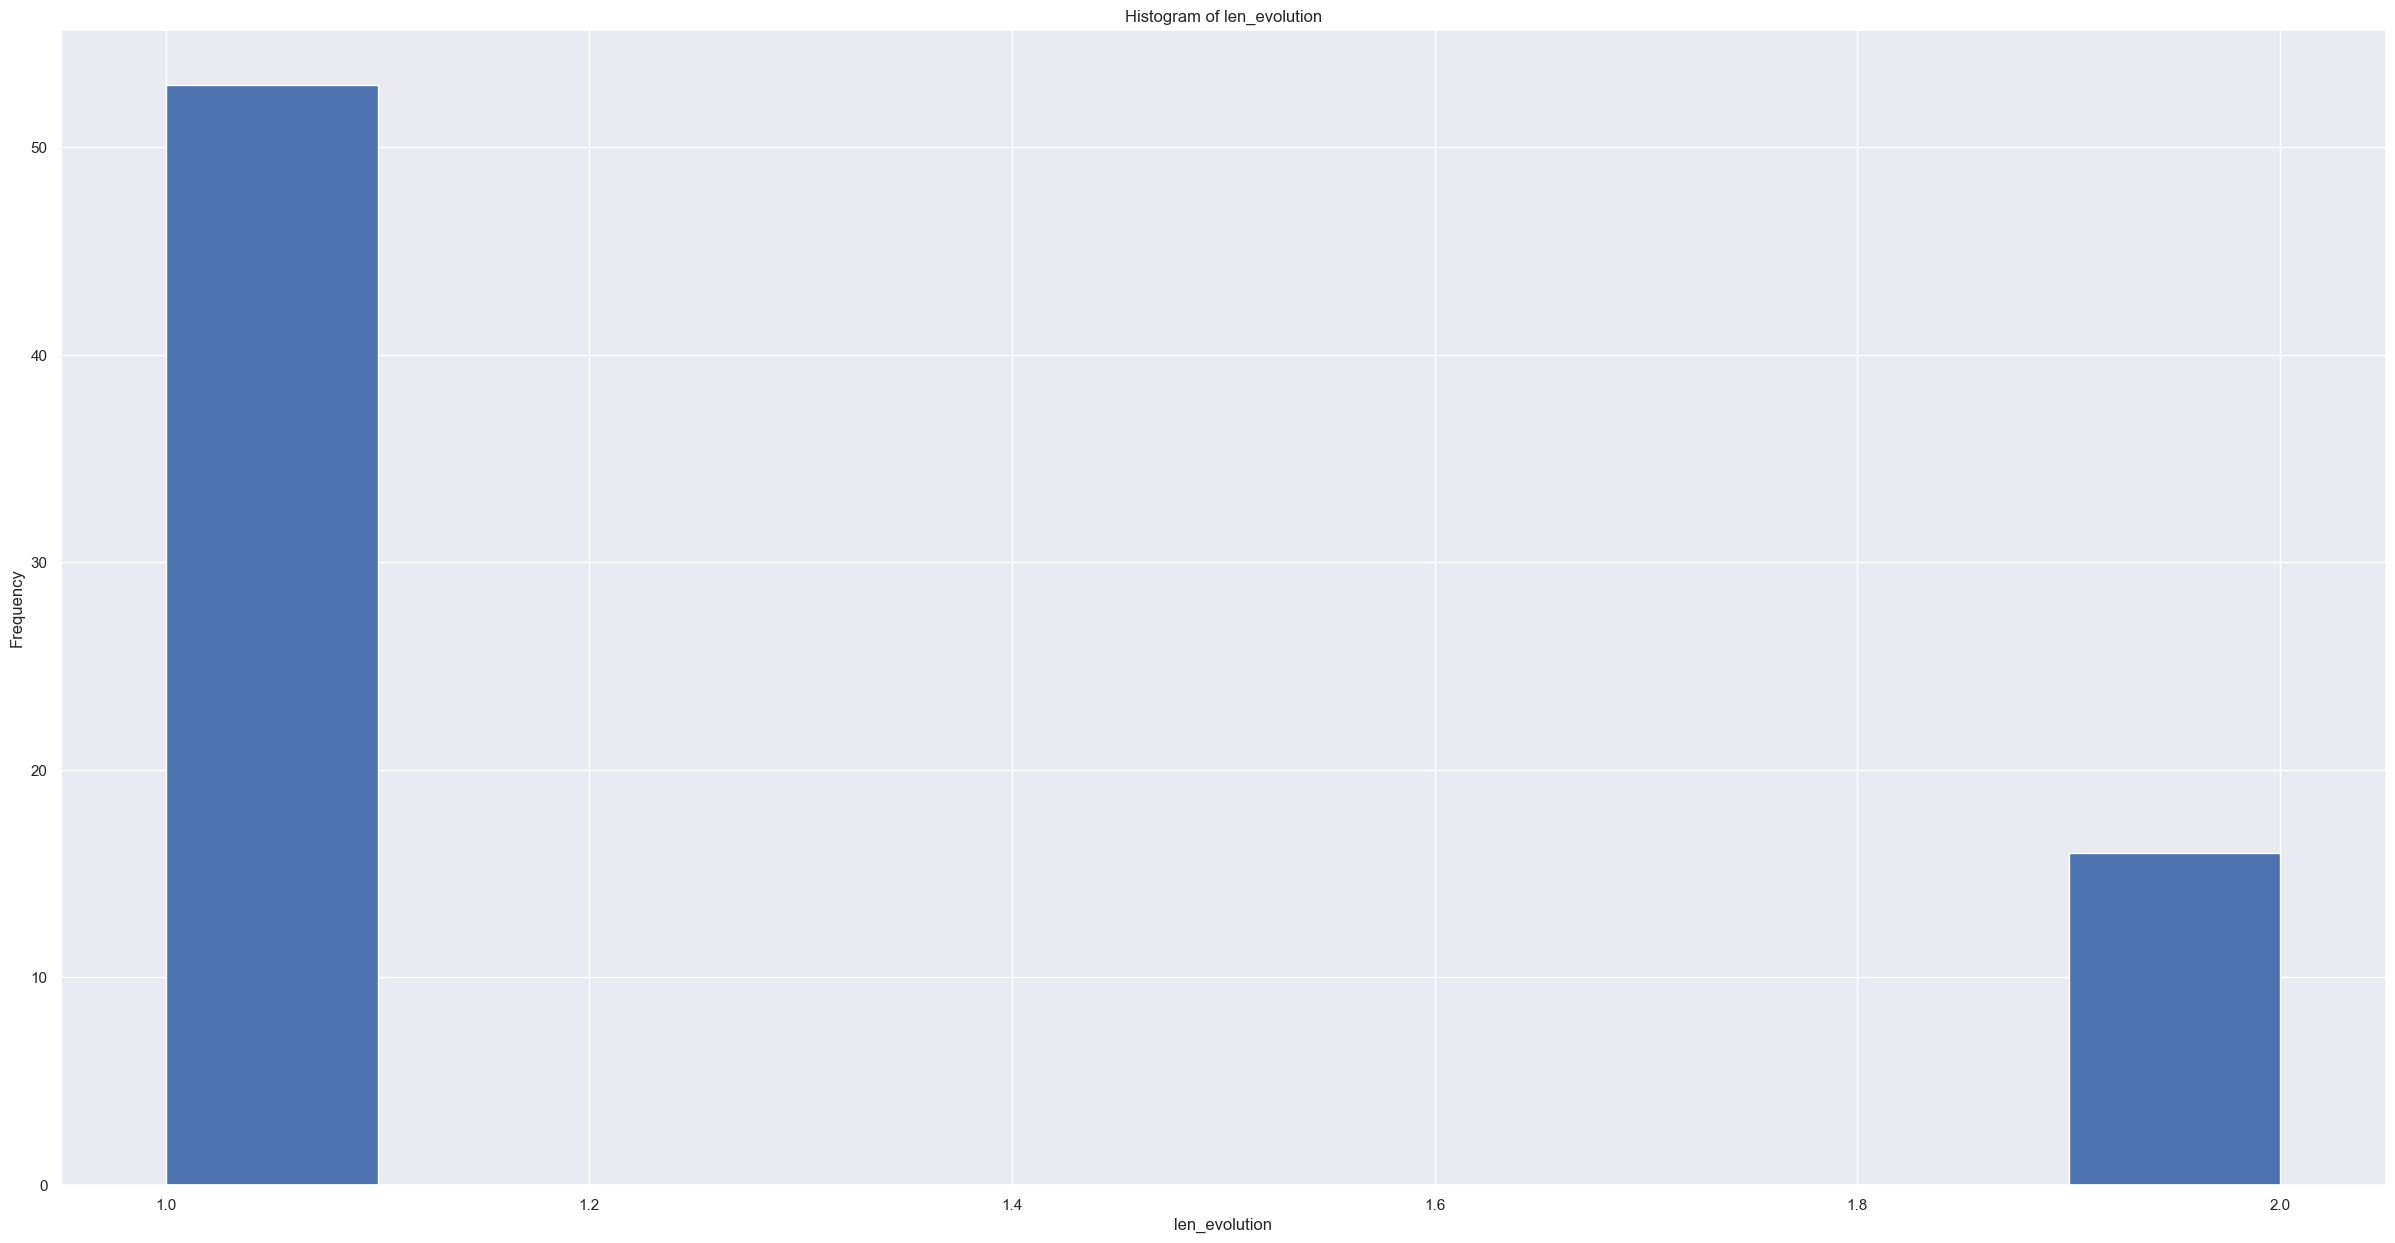

In [56]:
plt.hist(df5["len_evolution"], bins=10)
plt.xlabel('len_evolution')
plt.ylabel('Frequency')
plt.title('Histogram of len_evolution')
plt.show()

In [445]:
# here i got that values which is not having more then 2 evolution in next_evolution column

● Get all Pokemon who have more than two types of capabilities

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg


In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/Asus/krish naik matirial/notebooks/my_csv_file.csv",index_col=0)
df_copy = df.copy()

In [4]:
df_copy

,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
name,,,,,,,,,
Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
...,...,...,...,...,...,...,...,...,...
Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"
Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"
Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"


In [146]:
df_copy['fall']

0        Fell
1        Fell
2        Fell
3        Fell
4        Fell
         ... 
10197    Fell
10198    Fell
10199    Fell
10200    Fell
10201    Fell
Name: fall, Length: 10202, dtype: object

In [323]:
df_copy['fall'].unique()

array(['Fell', '1769-01-01 00:00:00', 'Found', '1822-01-01 00:00:00',
       '1704-01-01 00:00:00', '1937-01-01 00:00:00',
       '1791-01-01 00:00:00', '1966-01-01 00:00:00',
       '1976-01-01 00:00:00', '1944-01-01 00:00:00',
       '1654-01-01 00:00:00', '1960-01-01 00:00:00',
       '2000-01-01 00:00:00', '1983-01-01 00:00:00',
       '1949-01-01 00:00:00', '1951-01-01 00:00:00',
       '1931-01-01 00:00:00', '1950-01-01 00:00:00',
       '1842-01-01 00:00:00', '0921-01-01 00:00:00',
       '1750-01-01 00:00:00', '1662-01-01 00:00:00',
       '1520-01-01 00:00:00', '1775-01-01 00:00:00',
       '1910-01-01 00:00:00', '1989-01-01 00:00:00',
       '1779-01-01 00:00:00', '1843-01-01 00:00:00',
       '1636-01-01 00:00:00', '1647-01-01 00:00:00'], dtype=object)

In [324]:
df_copy = df_copy.drop(df_copy[df_copy['fall'].str.len() > 5].index)

In [325]:
df_copy['fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [326]:
df_copy.reset_index(drop=True,inplace=True)

In [327]:
df_copy

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
1,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
2,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
3,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
4,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]"
...,...,...,...,...,...,...,...,...,...,...
9943,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"
9944,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"
9945,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"
9946,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]"


● Get all the Earth meteorites that fell before the year 2000


In [328]:
d1 = df_copy[df_copy['fall'] == 'Found']

In [329]:
len(d1)

30

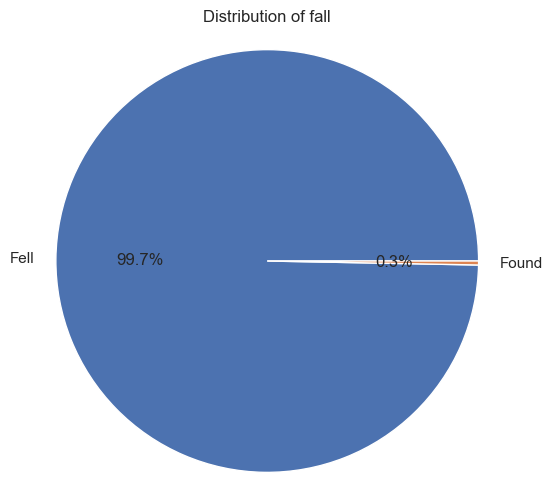

In [332]:
type_counts = df_copy['fall'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of fall')
plt.axis('equal')
plt.show()



In [334]:
import datetime

for i in range(len(df_copy['year'])):
          try:
                    datetime_obj = datetime.datetime.strptime(df_copy['year'][i], "%Y-%m-%d %H:%M:%S")
                    df_copy['year'][i] = datetime_obj
          except:
                    df_copy['year'][i] = None

C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\3307997855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['year'][i] = datetime_obj
C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\3307997855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['year'][i] = None


In [156]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9948 entries, 0 to 9947
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9948 non-null   object 
 1   id           9948 non-null   int64  
 2   nametype     9948 non-null   object 
 3   recclass     9948 non-null   object 
 4   mass         9948 non-null   object 
 5   fall         9948 non-null   object 
 6   year         9939 non-null   object 
 7   reclat       9864 non-null   float64
 8   reclong      9864 non-null   object 
 9   coordinates  9855 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 777.3+ KB


In [335]:
def count_fall(df_copy,col):
          list1 = []
          for i in range(len(df_copy[col])):
                    try:
                              list1.append(df_copy[col][i].year)
                    except:
                              list1.append(None)
          return list1
                    
obj = count_fall(df_copy,'year')

df_copy['fell_year'] = obj
          

In [336]:
df_copy

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates,fell_year
0,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
1,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
2,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
3,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
4,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
...,...,...,...,...,...,...,...,...,...,...,...
9943,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9944,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9945,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9946,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0


In [337]:
df1 = df_copy[(df_copy['fall'] == 'Fell') & (df_copy['fell_year'] < 2000)]

In [338]:
df1

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates,fell_year
0,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
1,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
2,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
3,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
4,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
...,...,...,...,...,...,...,...,...,...,...,...
9943,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9944,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9945,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9946,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0


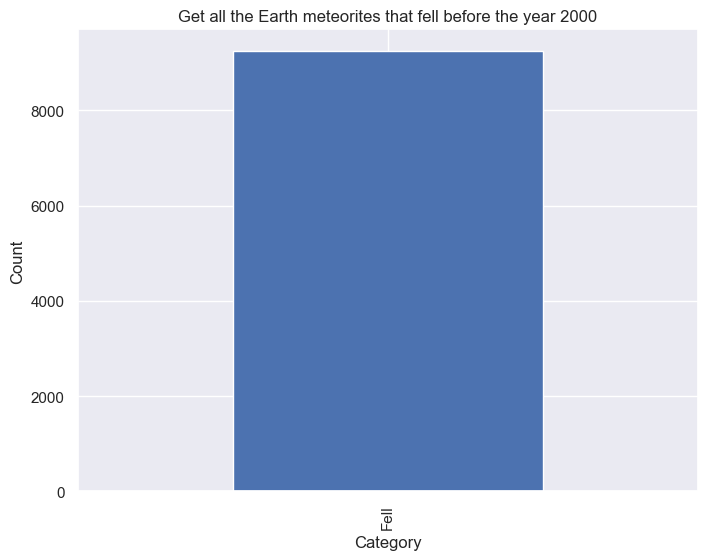

In [339]:
plt.figure(figsize=(8, 6))
plt.title('Get all the Earth meteorites that fell before the year 2000')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
df1['fall'].value_counts().plot.bar()
plt.show()

● Get all the earth meteorites co-ordinates who fell before the year 1970

In [340]:
df2 = df_copy[(df_copy['fall'] == 'Fell') & (df_copy['fell_year'] < 1970)]

In [341]:
df2

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates,fell_year
0,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
1,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
2,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
3,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
4,Aachen,1,Valid,L5,21,Fell,1880-01-01 00:00:00,50.775,6.083330,"[6.08333, 50.775]",1880.0
...,...,...,...,...,...,...,...,...,...,...,...
9943,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9944,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9945,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0
9946,Tomakovka,24019,Valid,LL6,600,Fell,1905-01-01 00:00:00,47.850,34.766670,"[34.76667, 47.85]",1905.0


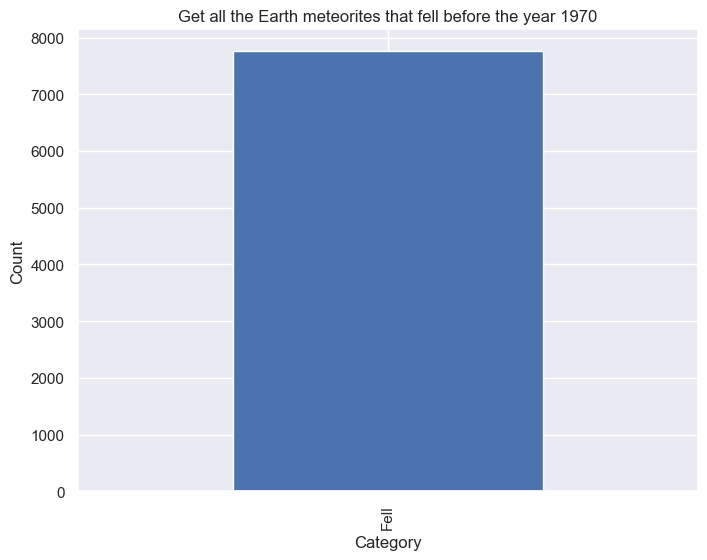

In [342]:
plt.figure(figsize=(8, 6))
plt.title('Get all the Earth meteorites that fell before the year 1970')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
df2['fall'].value_counts().plot.bar()
plt.show()

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [165]:
for i in range(len(df_copy['mass'])):
          if '.' in df_copy['mass'][i]:
                    df_copy['mass'][i] = int(float(df_copy['mass'][i]))
          else:
                    df_copy['mass'][i] = int(df_copy['mass'][i])
                    

C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\3735785919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['mass'][i] = int(df_copy['mass'][i])
C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\3735785919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['mass'][i] = int(float(df_copy['mass'][i]))


In [166]:
df_copy['mass'] = df_copy['mass'].astype('Int64')

In [167]:
df3 = df_copy[df_copy['mass'] > 10000]

In [168]:
df3

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates,fell_year
20,Abee,6,Valid,EH4,107000,Fell,1952-01-01 00:00:00,54.21667,-113.000000,"[-113, 54.21667]",1952.0
21,Abee,6,Valid,EH4,107000,Fell,1952-01-01 00:00:00,54.21667,-113.000000,"[-113, 54.21667]",1952.0
22,Abee,6,Valid,EH4,107000,Fell,1952-01-01 00:00:00,54.21667,-113.000000,"[-113, 54.21667]",1952.0
23,Abee,6,Valid,EH4,107000,Fell,1952-01-01 00:00:00,54.21667,-113.000000,"[-113, 54.21667]",1952.0
24,Abee,6,Valid,EH4,107000,Fell,1952-01-01 00:00:00,54.21667,-113.000000,"[-113, 54.21667]",1952.0
...,...,...,...,...,...,...,...,...,...,...,...
9933,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01 00:00:00,-6.66667,106.583330,"[106.58333, -6.66667]",1922.0
9934,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01 00:00:00,-6.66667,106.583330,"[106.58333, -6.66667]",1922.0
9935,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01 00:00:00,-6.66667,106.583330,"[106.58333, -6.66667]",1922.0
9936,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01 00:00:00,-6.66667,106.583330,"[106.58333, -6.66667]",1922.0


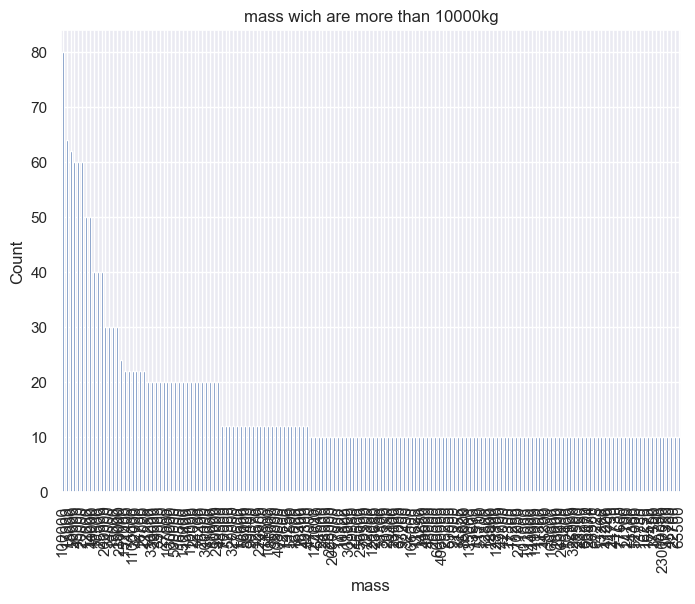

In [318]:
plt.figure(figsize=(8, 6))
plt.title('mass wich are more than 10000kg')
plt.xlabel('mass')
plt.ylabel('Count')
plt.xticks(rotation=45)
df3['mass'].value_counts().plot.bar()
plt.show()


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -


● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season


In [5]:
import pandas as pd

df = pd.read_excel("C:/Users/Asus/krish naik matirial/notebooks/season.xlsx",index_col=0)
df_copy = df.copy()

In [6]:
df_copy.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:00 PM,68,8.0,A woman named Dolores is a free sirit in the O...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00:00 PM,60,7.7,Bernard susects that someone is saotaging the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:00 PM,60,7.6,Bernard continues to investigate Dolores' suos...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:00 PM,60,8.0,Dolores takes the first ste on her ath of disc...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

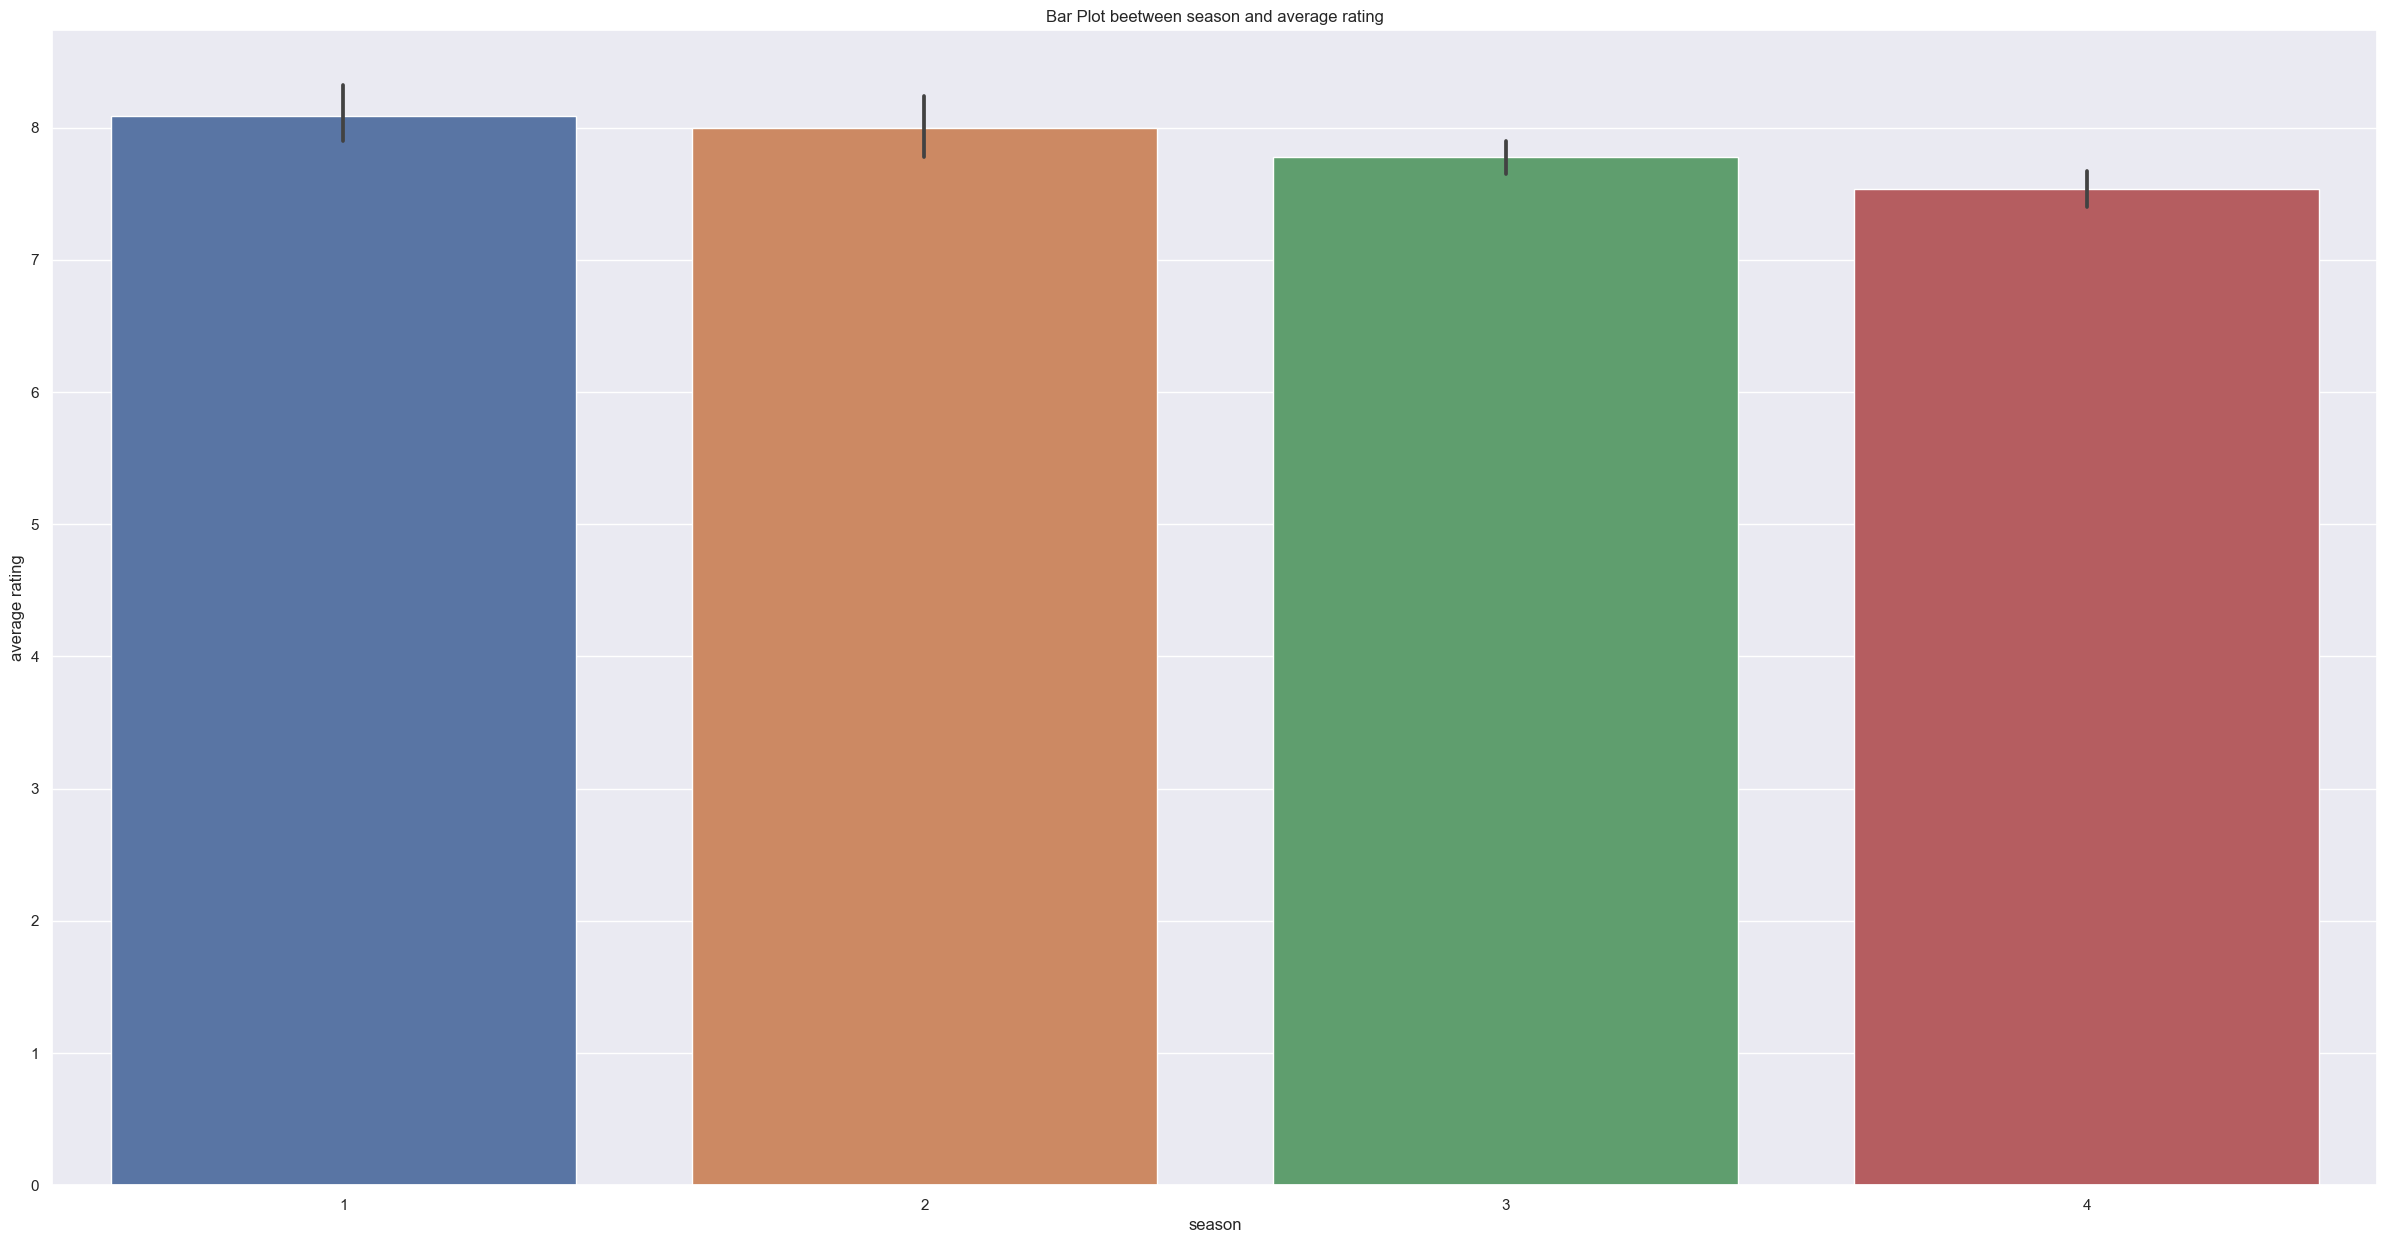

In [198]:
import seaborn as sns

sns.barplot(x=df_copy['season'], y=df_copy['average rating'])

# Add labels and title
plt.xlabel('season')
plt.ylabel('average rating')
plt.title('Bar Plot beetween season and average rating')

# Display the plot
plt.show()


● Get all the episode names, whose average rating is more than 8 for every season

In [199]:
df1 = df_copy[df_copy['average rating'] > 8]

In [200]:
df1

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00:00 PM,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00:00 PM,60,8.5,Bernard forces Roert to take him ack into his ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00:00 PM,90,8.7,Delores finds out the truth aout William's fat...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,09:00:00 PM,60,8.7,Another of Westworld's Host revolutionaries is...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,09:00:00 PM,60,8.4,The Man learns that his gri on reality isn't w...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,09:00:00 PM,90,8.5,"The Man faces a ersonal reckoning, while Akech...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


● Get all the episode names that aired before May 2019

In [202]:
df_copy['airdate']

0    2016-10-02
1    2016-10-09
2    2016-10-16
3    2016-10-23
4    2016-10-30
5    2016-11-06
6    2016-11-13
7    2016-11-20
8    2016-11-27
9    2016-12-04
10   2018-04-22
11   2018-04-29
12   2018-05-06
13   2018-05-13
14   2018-05-20
15   2018-05-27
16   2018-06-03
17   2018-06-10
18   2018-06-17
19   2018-06-24
20   2020-03-15
21   2020-03-22
22   2020-03-29
23   2020-04-05
24   2020-04-12
25   2020-04-19
26   2020-04-26
27   2020-05-03
28   2022-06-26
29   2022-07-03
30   2022-07-10
31   2022-07-17
32   2022-07-24
33   2022-07-31
34   2022-08-07
35   2022-08-14
Name: airdate, dtype: datetime64[ns]

In [207]:
def temp_func(df_copy,col):
          list1 = []
          for i in range(len(df_copy[col])):
                    month = df_copy[col][i].month
                    year = df_copy[col][i].year
                    if year <= 2019:
                              if year == 2019 and month < 5:
                                        list1.append(i)
                              list1.append(i)
                              
          return list1

obj = temp_func(df_copy,'airdate')

In [208]:
obj

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [209]:
episode_data = df_copy.loc[obj]

In [210]:
episode_data

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:00 PM,68,8.0,A woman named Dolores is a free sirit in the O...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00:00 PM,60,7.7,Bernard susects that someone is saotaging the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:00 PM,60,7.6,Bernard continues to investigate Dolores' suos...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:00 PM,60,8.0,Dolores takes the first ste on her ath of disc...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00:00 PM,60,8.0,"While Maeve convinces Felix to show her ""ustai...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00:00 PM,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,09:00:00 PM,60,7.9,Bernard tries to coe with what he did under Ro...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00:00 PM,60,8.5,Bernard forces Roert to take him ack into his ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00:00 PM,90,8.7,Delores finds out the truth aout William's fat...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


● Get the episode name from each season with the highest and lowest rating


In [211]:
result_dict = df_copy.groupby('season')['average rating'].apply(list).to_dict()

In [212]:
result_dict

{1: [8.0, 7.7, 7.6, 7.9, 8.0, 8.0, 8.6, 7.9, 8.5, 8.7],
 2: [7.8, 7.7, 7.7, 8.0, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5],
 3: [8.0, 7.8, 7.8, 8.0, 7.9, 7.5, 7.5, 7.7],
 4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]}

In [255]:
def rateing_func(result_dict):
          sample = pd.DataFrame()
          for key,value in result_dict.items():
                    val = sorted(value)
                    high_condition = (df_copy['average rating'] == val[-1]) & (df_copy['season'] == key)
                    
                    high_df = df_copy.loc[high_condition].copy()
                    
                    low_condition = (df_copy['average rating'] == val[0]) & (df_copy['season'] == key)
                    
                    low_df = df_copy.loc[low_condition].copy()
                    
                    sample = sample.append(high_df, ignore_index=True)
                    sample = sample.append(low_df, ignore_index=True)
                    
          return sample
                    
obj = rateing_func(result_dict)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\2290338593.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(high_df, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\2290338593.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(low_df, ignore_index=True)


In [256]:
obj

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00:00 PM,90,8.7,Delores finds out the truth aout William's fat...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:00 PM,60,7.6,Bernard continues to investigate Dolores' suos...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,09:00:00 PM,60,8.7,Another of Westworld's Host revolutionaries is...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1446362,https://www.tvmaze.com/episodes/1446362/westwo...,Akane No Mai,2,5,regular,2018-05-20,09:00:00 PM,60,7.6,"While Maeve and her eole exlore Shogun World, ...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1789333,https://www.tvmaze.com/episodes/1789333/westwo...,Parce Domine,3,1,regular,2020-03-15,09:00:00 PM,70,8.0,"If you're stuck in a loo, try walking in a str...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,1800148,https://www.tvmaze.com/episodes/1800148/westwo...,The Mother of Exiles,3,4,regular,2020-04-05,09:00:00 PM,70,8.0,The truth doesn't always set you free.,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,1829375,https://www.tvmaze.com/episodes/1829375/westwo...,Decoherence,3,6,regular,2020-04-19,09:00:00 PM,60,7.5,Do a lot of eole tell you that you need theray?,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,1800151,https://www.tvmaze.com/episodes/1800151/westwo...,Passed Pawn,3,7,regular,2020-04-26,09:00:00 PM,60,7.5,A real friend is one who walks in when the res...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,2326658,https://www.tvmaze.com/episodes/2326658/westwo...,Zhuangzi,4,5,regular,2022-07-24,09:00:00 PM,60,7.8,God is ored.,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,09:00:00 PM,55,7.1,Hello again. Don't worry aout a thing. It's al...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [257]:
# highest and lowest val according season and average rating

● Get the summary for the most popular ( ratings ) episode in every season


In [269]:
group_counts = df_copy.groupby('season')['average rating'].value_counts()

highest_repeating_values = group_counts.groupby('season').idxmax().values

sample = pd.DataFrame()
for i in highest_repeating_values:
          val = (df_copy['average rating'] == i[1]) & (df_copy['season'] == i[0])
          val_df = df_copy.loc[val].copy()
                    
          sample = sample.append(val_df, ignore_index=True)
          


C:\Users\Asus\AppData\Local\Temp\ipykernel_6148\824967296.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(val_df, ignore_index=True)


In [270]:
sample

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:00 PM,68,8.0,A woman named Dolores is a free sirit in the O...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:00 PM,60,8.0,Dolores takes the first ste on her ath of disc...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00:00 PM,60,8.0,"While Maeve convinces Felix to show her ""ustai...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1440915,https://www.tvmaze.com/episodes/1440915/westwo...,Reunion,2,2,regular,2018-04-29,09:00:00 PM,60,7.7,Dolores looks for allies symathetic to her cau...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1440916,https://www.tvmaze.com/episodes/1440916/westwo...,Virtù e Fortuna,2,3,regular,2018-05-06,09:00:00 PM,60,7.7,While Delores makes a deal with the Confederad...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,1453278,https://www.tvmaze.com/episodes/1453278/westwo...,Phase Space,2,6,regular,2018-05-27,09:00:00 PM,60,7.7,"Maeve finds her daughter, Delores finds the ""r...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,1829375,https://www.tvmaze.com/episodes/1829375/westwo...,Decoherence,3,6,regular,2020-04-19,09:00:00 PM,60,7.5,Do a lot of eole tell you that you need theray?,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,1800151,https://www.tvmaze.com/episodes/1800151/westwo...,Passed Pawn,3,7,regular,2020-04-26,09:00:00 PM,60,7.5,A real friend is one who walks in when the res...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,2326659,https://www.tvmaze.com/episodes/2326659/westwo...,Fidelity,4,6,regular,2022-07-31,09:00:00 PM,60,7.5,To thine own selves e true.,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,2326661,https://www.tvmaze.com/episodes/2326661/westwo...,"Que Será, Será",4,8,regular,2022-08-14,09:00:00 PM,60,7.5,Like what I've done with the lace? (I just cra...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [271]:
# here is the summary for the most popular ( ratings ) episode in every season

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -

1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

In [272]:
import pandas as pd

df = pd.read_csv("C:/Users/Asus/krish naik matirial/notebooks/Electric_Vehicle_Population_Data.csv",index_col=None)
df_copy = df.copy()

In [273]:
df_copy

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [274]:
df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [275]:
df1 = df_copy[df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']

In [280]:
df_ans = df1.loc[:,['Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type','Make','Model']]

In [281]:
df_ans

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Vehicle Type,Make,Model
6,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV),FORD,FUSION
7,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV),AUDI,Q5 E
8,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV),FORD,C-MAX
11,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV),TESLA,MODEL Y
14,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV),FORD,C-MAX
...,...,...,...,...
130437,Not eligible due to low battery range,Plug-in Hybrid Electric Vehicle (PHEV),BMW,530E
130438,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV),TESLA,MODEL Y
130439,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV),NISSAN,LEAF
130440,Eligibility unknown as battery range has not b...,Battery Electric Vehicle (BEV),TESLA,MODEL Y


Observation

This is are the cars modal and comapany name and their type which is not pass Clean Alternative Fuel Vehicle (CAFV) Eligibility

● Get all TESLA cars with the model year, and model type made in Bothell City

In [283]:
df_copy

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [284]:
df1 = df_copy[(df_copy['Make'] == 'TESLA') & (df_copy['City'] == 'Bothell')]

In [285]:
df1

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
39,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,21.0,127506886,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
217,5YJ3E1EB9N,King,Bothell,WA,98011.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,195097472,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
218,7SAYGDEEXN,Snohomish,Bothell,WA,98012.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,205456996,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
222,5YJ3E1EB6J,King,Bothell,WA,98011.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,200733662,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129778,5YJ3E1EB3K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,176326356,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
129954,5YJ3E1EB3M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,137418676,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
129976,5YJSA1S10E,Snohomish,Bothell,WA,98021.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,1.0,171609553,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
130295,5YJ3E1EA8N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,211349001,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [288]:
df_ans = df1.loc[:,['Model Year','Model','Make','City']]

In [289]:
df_ans

,Model Year,Model,Make,City
39,2020,MODEL 3,TESLA,Bothell
217,2022,MODEL 3,TESLA,Bothell
218,2022,MODEL Y,TESLA,Bothell
222,2018,MODEL 3,TESLA,Bothell
292,2017,MODEL X,TESLA,Bothell
...,...,...,...,...
129778,2019,MODEL 3,TESLA,Bothell
129954,2021,MODEL 3,TESLA,Bothell
129976,2014,MODEL S,TESLA,Bothell
130295,2022,MODEL 3,TESLA,Bothell


Observation

This are all the Tesla cars which make in Bothell city

● Get all the cars that have an electric range of more than 100, and were made after
2015


In [290]:
df_copy['Electric Range']

0         238
1          47
2         220
3          75
4         210
         ... 
130438      0
130439      0
130440      0
130441    293
130442      0
Name: Electric Range, Length: 130443, dtype: int64

In [291]:
df_copy['Model Year']

0         2018
1         2021
2         2019
3         2013
4         2017
          ... 
130438    2023
130439    2022
130440    2021
130441    2020
130442    2021
Name: Model Year, Length: 130443, dtype: int64

In [292]:
df1 = df_copy[(df_copy['Model Year'] > 2015) & (df_copy['Electric Range'] > 100)]

In [293]:
df1

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


Observation

This are all the cars that have an electric range of more than 100, and were made after
2015


● Draw plots to show the distribution between city and electric vehicle type

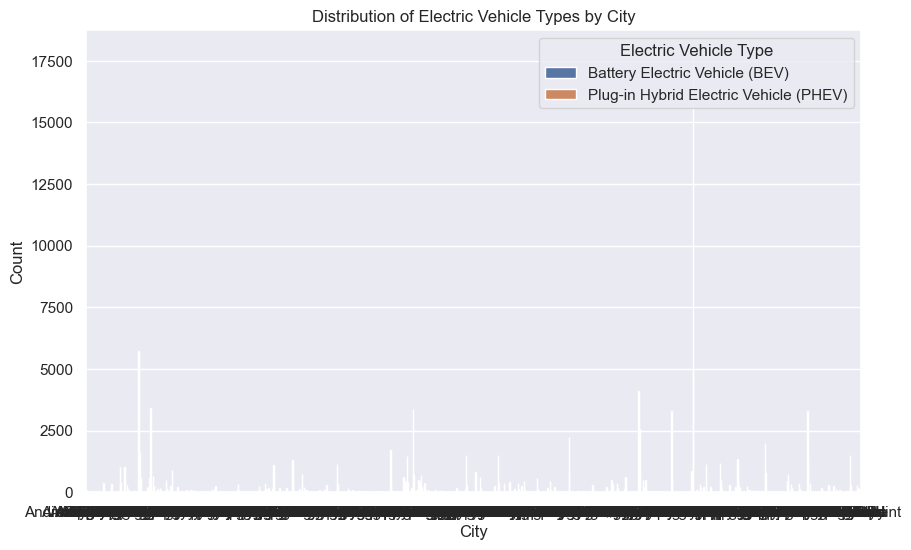

In [295]:
data_counts = df_copy.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_counts, x='City', y='Count', hue='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

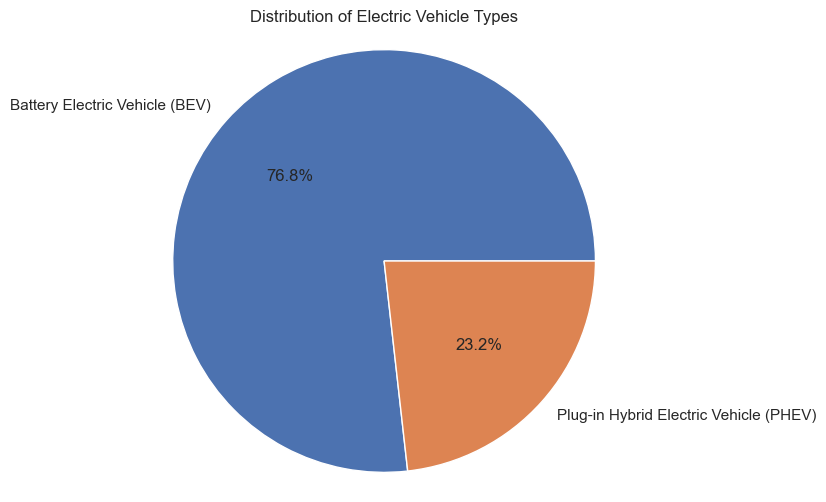

In [296]:
type_counts = df_copy['Electric Vehicle Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.axis('equal')
plt.show()